# LDA Topic Modeling with Gensim

Heavily modified and expanded based upon Gensim tutorial

By Jon Chun
28 Mar 2022 Updated

# Setup and Configuration

In [ ]:
%whos

Interactive namespace is empty.


In [ ]:
%%time

# NOTE: 54s

!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 414.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you ha

In [ ]:
%%time

# NOTE: 9s

!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.9 MB/s eta 0:00:00
CPU times: user 60.2 ms, sys: 12.3 ms, total: 72.5 ms
Wall time: 7.46 s


In [ ]:
!pip install gensim

In [ ]:
# Installation cell: Run this in a separate cell and then restart the runtime
%pip uninstall -y numpy
%pip install numpy==1.26.4
%pip install gensim==4.3.3


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# **[RUNTIME->RESTART SESSION]** and **[RETURN TO CONTINUE FROM THIS POINT ONWARD]**

In [ ]:
# IF the OUTPUT from this code is:

# numpy version: 1.26.4
# gensim version: 4.3.3

# then the compatible numpy/gensim libraries have been
# successfully installed and you can proceed beyond this point

import numpy
import gensim
print("numpy version:", numpy.__version__)
print("gensim version:", gensim.__version__)

# ELSE if you get an OUTPUT error here
# you must [RUNTIME->DISCONNECT AND DELETE RUNTIME] to start over

numpy version: 1.26.4
gensim version: 4.3.3


## Configure Jupyter Notebook

In [ ]:
%%time

# NOTE:

## Configure Jupyter Notebook

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

CPU times: user 131 ms, sys: 8.15 ms, total: 139 ms
Wall time: 279 ms


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
InteractiveShell.ast_transformers = []
InteractiveShell.display_limit = 10000  # Limit output to 10,000 characters

## Import Libraries

In [ ]:
%%time

# NOTE:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

CPU times: user 955 ms, sys: 92.5 ms, total: 1.05 s
Wall time: 1.66 s


# Upload Plaintext Datafile

**[STEP 1]** Find a mid-length+ novel you are familiar with and download the *.txt version to your local harddrive:
1. https://gutenberg.net.au/ (less restrictive IP)
2. https://www.gutenberg.org/ebooks/

**[STEP 2]** download and save the corpus using a simple filename like: "book_ulysses_james-joyce.txt"
1. all lowercase
2. only text or '_' or '-' (no other punctuation or whitespaces)
3. no leading numbers
these are OS-friendly and legal Python variable names

**[STEP 3]** open the text file and trim/delete the header and footer cruft (not core novel)

**[STEP 4]** THEN, upload this file in the next code cell


## OPTION A

In [ ]:
# OPTION A: If your upload file is small enough you
#           can upload it with this code cell

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  textfile_name = fn.split('.')[0]


Saving test_matches_1500_paragraphs.txt to test_matches_1500_paragraphs.txt
User uploaded file "test_matches_1500_paragraphs.txt" with length 97933822 bytes


## OPTION B

In [ ]:
# OPTION B: If your upload file is too big such that OPTION A fails
#           try running this code

from google.colab import files
import os

def upload_and_process_file():
    """
    Uploads a file, saves the root of the filename to textfile_name, and handles potential large file issues.
    """
    try:
        uploaded = files.upload()

        if not uploaded:
            print("No files uploaded.")
            return None

        for fn, file_content in uploaded.items():
            print(f'User uploaded file "{fn}" with length {len(file_content)} bytes')
            textfile_name = os.path.splitext(fn)[0]  # Robustly split filename and extension.
            print(f"Root filename: {textfile_name}")

            # Optionally, you can write the filename root to a file or use it as needed.
            # Example: writing the name to a file.
            output_filename = "filename_root.txt"
            with open(output_filename, "w") as f:
                f.write(textfile_name)
            print(f"Filename root saved to {output_filename}")

            return textfile_name #returning the root filename

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
textfile_name = upload_and_process_file()

if textfile_name:
  print(f"The root filename is: {textfile_name}")

## OPTION C

In [ ]:
# OPTION C: If the file is too large and/or cannot be uploaded using OPTION A or OPTION B
#           1. click on the bottom folder icon in the vertical left margin to show the remote virtual file system,
#           2. open a Finder(MacOS)/File Explorer(Win) window showing the text file to upload
#           3. drag and drop your local laptop text file onto the remote virtual file system in the vertical left margin

# MANUALLY set the root file name (e.g. trim the trailing extension ".txt")

textfile_name = "book_bible_king-james" # ROOT filename for "book_bible_king-james.txt"

In [ ]:
# Multiple uploads of same file creates multiple versions with " (n}.txt" suffix
# if you've uploaded multiple version, just be deleted these and start over

# !rm book_*

In [ ]:
# First manually upload your text file via the Jupyter menu
#   then run this code cell to make sure it appears here in the working directory

!ls


# LDA Model

Introduces Gensim's LDA model and demonstrates its use on the NIPS corpus.


The purpose of this tutorial is to demonstrate how to train and tune an LDA model.

In this tutorial we will:

* Load input data.
* Pre-process that data.
* Transform documents into bag-of-words vectors.
* Train an LDA model.

This tutorial will **not**:

* Explain how Latent Dirichlet Allocation works
* Explain how the LDA model performs inference
* Teach you all the parameters and options for Gensim's LDA implementation

If you are not familiar with the LDA model or how to use it in Gensim, I (Olavur Mortensen)
suggest you read up on that before continuing with this tutorial. Basic
understanding of the LDA model should suffice. Examples:

* `Introduction to Latent Dirichlet Allocation <http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation>`_
* Gensim tutorial: `sphx_glr_auto_examples_core_run_topics_and_transformations.py`
* Gensim's LDA model API docs: :py:class:`gensim.models.LdaModel`

I would also encourage you to consider each step when applying the model to
your data, instead of just blindly applying my solution. The different steps
will depend on your data and possibly your goal with the model.





## Read Textfile

In [ ]:
!ls -al

total 95656
drwxr-xr-x 1 root root     4096 May  8 04:31 .
drwxr-xr-x 1 root root     4096 May  8 04:26 ..
drwxr-xr-x 4 root root     4096 May  6 13:38 .config
drwxr-xr-x 1 root root     4096 May  6 13:38 sample_data
-rw-r--r-- 1 root root 97933822 May  8 04:31 test_matches_1500_paragraphs.txt


In [ ]:
with open(f"{textfile_name}.txt", 'r', encoding='ascii', errors='ignore') as f:
    book_all_str = f.read()

type(book_all_str)

str

In [ ]:
# Get char count
len(book_all_str)

97933659

In [ ]:
print(book_all_str[:1000])

Match 5: Bumrah and Siraj Fire India To Victory | Final Session IN FULL | England v India

 om who's had such an influential role to play here today getting India out of a hole first of all with the bat an unbelievable remarkable partnership with Muhammad shami at the start of the day when India really looked like they're in a losing position P themselves into a position where they were favorites to win and uh started things off as well with the wicked of Rory Burns bowling with good fire and aggression at  start what a day for Joe root now uh his role as a batsman but earlier was at the center of things when England threw away that position with a a bad hour in the field before  lunch the last day eing flowing as has the whole  game done Coy it's slipped bumra first over after T and England's Captain has gone real drama now Elation from India into the safe fans of the captain at first slip bumra again probing round about off stump and it just lives it bounces and it's straight in pouc

## Split the single text Book/Corpus into Documents on Paragraph Boundries

In [ ]:
# Split into paragraphs separated by RETURN/blank line(s)

# CUSTOMIZE: Might have to change paragraphs separator either
# (a) '\n\n'
# (b) '\n'
# (c) something else (e.g. no '\n' in text)

parags_ls = book_all_str.split('\n') # MIGHT HAVE TO CHANGE '\n' OR '\n\n' (two newlines)

# Replace stray/embedded /n with a space
book_parags_clean_ls = []
for aparag in parags_ls:
  book_parags_clean_ls.append(aparag.replace('\n',' '))

parags_ls = book_parags_clean_ls
parags_ls = [aparag for aparag in parags_ls if len(aparag.strip()) > 0]
parags_ls[:50]

['Match 5: Bumrah and Siraj Fire India To Victory | Final Session IN FULL | England v India',
 " om who's had such an influential role to play here today getting India out of a hole first of all with the bat an unbelievable remarkable partnership with Muhammad shami at the start of the day when India really looked like they're in a losing position P themselves into a position where they were favorites to win and uh started things off as well with the wicked of Rory Burns bowling with good fire and aggression at  start what a day for Joe root now uh his role as a batsman but earlier was at the center of things when England threw away that position with a a bad hour in the field before  lunch the last day eing flowing as has the whole  game done Coy it's slipped bumra first over after T and England's Captain has gone real drama now Elation from India into the safe fans of the captain at first slip bumra again probing round about off stump and it just lives it bounces and it's straight in

In [ ]:
# Get paragraph count

# VERIFY: Should not be 0, 1 or <100, <1000 depending on task/text

len(parags_ls)

2509

### Remove page numbers, chapter:verse, or other numbers

In [ ]:
FLAG_DEL_SOLO_NUM = True   # FLAG to control whether to delete lines that only consist of numbers (e.g. page header/footers)
FLAG_DEL_REGEX_NUM = True  # FLAG to control whether to apply a list (FILTER_REGEX_LS) of regex expressions to apply as custom filters
FLAG_DEL_ALL_NUM = True    # FLAG to control whether to delete all numbers embedded in any line/string
FILTER_REGEX_LS = [r'\d+:\d+']  # LIST of custom regex filter rules (e.g. chapter:verse number:number in Bible)

def filter_nums(parags_ls, FLAG_DEL_SOLO_NUM=True, FLAG_DEL_REGEX_NUM=True,
                FLAG_DEL_ALL_NUM=True, FILTER_REGEX_LS=[r'\d+:\d+']):
    """
    Filter numbers from a list of paragraph strings based on specified flags.

    Parameters:
    -----------
    parags_ls : list
        List of paragraph strings to filter
    FLAG_DEL_SOLO_NUM : bool, optional
        If True, remove lines that contain only numbers (default is True)
    FLAG_DEL_REGEX_NUM : bool, optional
        If True, remove numbers matching regex patterns in FILTER_REGEX_LS (default is True)
    FLAG_DEL_ALL_NUM : bool, optional
        If True, remove all numbers from strings (default is True)
    FILTER_REGEX_LS : list, optional
        List of regex patterns to match for removal (default is [r'\d+:\d+'])

    Returns:
    --------
    list
        Filtered list of paragraph strings
    """
    import re

    # Create a working copy of the input list
    filtered_parags = parags_ls.copy()

    # Step 1: First iteration - apply number filtering based on flags
    temp_parags = []
    for para in filtered_parags:
        # Skip processing if the paragraph is empty
        if not para.strip():
            continue

        # Step 2: Remove solo numbers if FLAG_DEL_SOLO_NUM is True
        if FLAG_DEL_SOLO_NUM and re.match(r'^\s*\d+(\.\d+)?\s*$', para):
            continue

        modified_para = para

        # Step 3: Remove numbers matching patterns in FILTER_REGEX_LS if FLAG_DEL_REGEX_NUM is True
        if FLAG_DEL_REGEX_NUM:
            for pattern in FILTER_REGEX_LS:
                modified_para = re.sub(pattern, '', modified_para)

        # Step 4: Remove all numbers if FLAG_DEL_ALL_NUM is True
        if FLAG_DEL_ALL_NUM:
            modified_para = re.sub(r'\d+(\.\d+)?', '', modified_para)

        temp_parags.append(modified_para)

    # Step 5: Second iteration - trim and remove empty strings
    result_parags = []
    for para in temp_parags:
        # Trim whitespace
        trimmed_para = para.strip()

        # Only keep non-empty strings
        if len(trimmed_para) > 0:
            result_parags.append(trimmed_para)

    # Step 6: Return the filtered list
    return result_parags

In [ ]:
parags_ls = filter_nums(parags_ls)

In [ ]:
# VERFIY FLAG filters worked

parags_ls[:50]

['Match : Bumrah and Siraj Fire India To Victory | Final Session IN FULL | England v India',
 "om who's had such an influential role to play here today getting India out of a hole first of all with the bat an unbelievable remarkable partnership with Muhammad shami at the start of the day when India really looked like they're in a losing position P themselves into a position where they were favorites to win and uh started things off as well with the wicked of Rory Burns bowling with good fire and aggression at  start what a day for Joe root now uh his role as a batsman but earlier was at the center of things when England threw away that position with a a bad hour in the field before  lunch the last day eing flowing as has the whole  game done Coy it's slipped bumra first over after T and England's Captain has gone real drama now Elation from India into the safe fans of the captain at first slip bumra again probing round about off stump and it just lives it bounces and it's straight in p

In [ ]:
# Get paragraph count

# VERIFY: Should not be 0, 1 or <100, <1000 depending on task/text

len(parags_ls)

2509

In [ ]:
# VERIFY: first paragraph (after title and chapter headings)

print(parags_ls[1000:1010])
print('\n')
# Paragraph char count
len(parags_ls[3])

["reluctant yesterday to play this shot left him alone and now here this morning fancy these chances never really got on to one and then that one there just popped it straight to Mid on a good piece of Bing from Lee not a good piece of Bing from Gale first Wicket down  runs it's   so an immediate loss for the West Indies a big setb after Gail and Smith had played so well yesterday for  overs on one ball played with real commitment and application this morning G just not there play a bad shot in the over trying to pull missed it and now pull shot to Mid on here's gangero so that's the end of the over from Leah a wicket in the over it's  for one  that's a real psychological and actual setback for the West Indies to have a wicket going that early here it is completely miscued and just carrying to midon taken low down by War straightforward catch really just had to wait for it to come to him here's now Gillespie to Smith well often they accuse fast Ballers of uh not thinking about too much

14339

In [ ]:
# NOTE: Not neccessary with Agglomeration below

# Delete any paragraphs shorter than MIN_LEN_PARAG

# CUSTOMIZE: Set  minimum paragraph length MIN_LEN_PARAG
# MIN_LEN_PARAG = 5
# MIN_LEN_DOC = 1000

# Delete any paragraphs shorter than MIN_LEN_PARAG
# parags_ls = [x for x in parags_ls if len(x) > MIN_LEN_PARAG]

# Trim any leading/trailing/multiple embedded whitespaces
# parags_ls = [' '.join(x.split()) for x in parags_ls]

# len(parags_ls)

In [ ]:
# VERIFY 10 docs/paragraphs between 100-110

start_indx = 100
end_indx = 110
for indx, aparag in enumerate(parags_ls[start_indx:end_indx]):
  print(f"Paragraph #{start_indx+indx}: {aparag}")

Paragraph #100: Jamal Warrington to continue quite a few catches close to the Wicket there is two in that slipco and there's a cylinder man at Extra cover the captain himself Craig brathweed good time to attack I was looking forward to seeing Jamal warwickan with this new wall I was curious to see I thought that a lot better for me what other threats he will pause quite good with the order ball all day long but perhaps this one with a low him to extra a lot more bones foreign work and came into the side and there was a bit of debate about his inclusion ahead of versami pomal who had a very good was in his first class Championship season second the Wicket taken only to Rakeem Cornwall the mall with  wickets in his five matches didn't get a look in or could only played two matches in that first class season so really have the opportunity to fully compare with two Bowlers of similar styles with left arm spinners oh so far I'd say Jamal War can has given a good account of himself beating t

## Customize Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords_ls = stopwords.words('english')

# CUSTOMIZE: Optionally add low-info/semantically noisy words you want to remove from the corpus
stopwords_custom_ls = ['chapter', 'bazinga', 'he']

stopwords_ls = stopwords_ls + stopwords_custom_ls
stopwords_ls.sort()

print(f'\nThe first twenty stopwords:')
stopwords_ls[:20]

print(f'\nThe last twenty stopwords:')
stopwords_ls[-20:]

print(f'\n\nThere are [{len(stopwords_ls)}] English stopwords imported from NLTK')



The first twenty stopwords:

The last twenty stopwords:


There are [201] English stopwords imported from NLTK


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove all stopwords before expanding contractions

parags_nostop_ls_ls = [[atoken for atoken in aparag.split() if not atoken in stopwords_ls] for aparag in parags_ls]

# VERIFY: Pick a paragraph number to test

parag_no = 1000

print(f'BEFORE: {parags_ls[parag_no]} AFTER: {parags_nostop_ls_ls[parag_no]}')
print(f'BEFORE: {len(parags_ls[parag_no].split())} AFTER: {len(parags_nostop_ls_ls[parag_no])}')

print(f'BEFORE: {len(parags_ls)} AFTER: {len(parags_nostop_ls_ls)}')

# Delete empty
parags_nostop_ls_ls = [x for x in parags_nostop_ls_ls if len(x) > 0]

print(f'BEFORE: {len(parags_ls)} AFTER: {len(parags_nostop_ls_ls)}')

BEFORE: reluctant yesterday to play this shot left him alone and now here this morning fancy these chances never really got on to one and then that one there just popped it straight to Mid on a good piece of Bing from Lee not a good piece of Bing from Gale first Wicket down  runs it's   so an immediate loss for the West Indies a big setb after Gail and Smith had played so well yesterday for  overs on one ball played with real commitment and application this morning G just not there play a bad shot in the over trying to pull missed it and now pull shot to Mid on here's gangero so that's the end of the over from Leah a wicket in the over it's  for one  that's a real psychological and actual setback for the West Indies to have a wicket going that early here it is completely miscued and just carrying to midon taken low down by War straightforward catch really just had to wait for it to come to him here's now Gillespie to Smith well often they accuse fast Ballers of uh not thinking about to

In [ ]:
parags_nostop_ls_ls[1000:1100]

[['reluctant',
  'yesterday',
  'play',
  'shot',
  'left',
  'alone',
  'morning',
  'fancy',
  'chances',
  'never',
  'really',
  'got',
  'one',
  'one',
  'popped',
  'straight',
  'Mid',
  'good',
  'piece',
  'Bing',
  'Lee',
  'good',
  'piece',
  'Bing',
  'Gale',
  'first',
  'Wicket',
  'runs',
  'immediate',
  'loss',
  'West',
  'Indies',
  'big',
  'setb',
  'Gail',
  'Smith',
  'played',
  'well',
  'yesterday',
  'overs',
  'one',
  'ball',
  'played',
  'real',
  'commitment',
  'application',
  'morning',
  'G',
  'play',
  'bad',
  'shot',
  'trying',
  'pull',
  'missed',
  'pull',
  'shot',
  'Mid',
  "here's",
  'gangero',
  "that's",
  'end',
  'Leah',
  'wicket',
  'one',
  "that's",
  'real',
  'psychological',
  'actual',
  'setback',
  'West',
  'Indies',
  'wicket',
  'going',
  'early',
  'completely',
  'miscued',
  'carrying',
  'midon',
  'taken',
  'low',
  'War',
  'straightforward',
  'catch',
  'really',
  'wait',
  'come',
  "here's",
  'Gillespie',

## Expand Contractions

In [ ]:
# Expand Contractions (e.g. can't -> can not)

import contractions

# Test
print('Not fixed:')
contractions.fix("yall're happy now", slang=False) # default: true
print('\n\nFixed:')
contractions.fix("you're happy now", slang=False) # default: true

Not fixed:


Fixed:


'you are happy now'

In [ ]:
# Expand all Contractions paragraph by paragraph
parags_nostop_expand_ls_ls = [[contractions.fix(atoken) for atoken in aparag_nostop_ls] for aparag_nostop_ls in parags_nostop_ls_ls]

# VERIFY: set index range
parags_nostop_expand_ls_ls[1000:1100]


[['reluctant',
  'yesterday',
  'play',
  'shot',
  'left',
  'alone',
  'morning',
  'fancy',
  'chances',
  'never',
  'really',
  'got',
  'one',
  'one',
  'popped',
  'straight',
  'Mid',
  'good',
  'piece',
  'Bing',
  'Lee',
  'good',
  'piece',
  'Bing',
  'Gale',
  'first',
  'Wicket',
  'runs',
  'immediate',
  'loss',
  'West',
  'Indies',
  'big',
  'setb',
  'Gail',
  'Smith',
  'played',
  'well',
  'yesterday',
  'overs',
  'one',
  'ball',
  'played',
  'real',
  'commitment',
  'application',
  'morning',
  'G',
  'play',
  'bad',
  'shot',
  'trying',
  'pull',
  'missed',
  'pull',
  'shot',
  'Mid',
  'here is',
  'gangero',
  'that is',
  'end',
  'Leah',
  'wicket',
  'one',
  'that is',
  'real',
  'psychological',
  'actual',
  'setback',
  'West',
  'Indies',
  'wicket',
  'going',
  'early',
  'completely',
  'miscued',
  'carrying',
  'midon',
  'taken',
  'low',
  'War',
  'straightforward',
  'catch',
  'really',
  'wait',
  'come',
  'here is',
  'Gillesp

In [ ]:
len(parags_nostop_expand_ls_ls)
parags_nostop_expand_ls_ls[1000]

['reluctant',
 'yesterday',
 'play',
 'shot',
 'left',
 'alone',
 'morning',
 'fancy',
 'chances',
 'never',
 'really',
 'got',
 'one',
 'one',
 'popped',
 'straight',
 'Mid',
 'good',
 'piece',
 'Bing',
 'Lee',
 'good',
 'piece',
 'Bing',
 'Gale',
 'first',
 'Wicket',
 'runs',
 'immediate',
 'loss',
 'West',
 'Indies',
 'big',
 'setb',
 'Gail',
 'Smith',
 'played',
 'well',
 'yesterday',
 'overs',
 'one',
 'ball',
 'played',
 'real',
 'commitment',
 'application',
 'morning',
 'G',
 'play',
 'bad',
 'shot',
 'trying',
 'pull',
 'missed',
 'pull',
 'shot',
 'Mid',
 'here is',
 'gangero',
 'that is',
 'end',
 'Leah',
 'wicket',
 'one',
 'that is',
 'real',
 'psychological',
 'actual',
 'setback',
 'West',
 'Indies',
 'wicket',
 'going',
 'early',
 'completely',
 'miscued',
 'carrying',
 'midon',
 'taken',
 'low',
 'War',
 'straightforward',
 'catch',
 'really',
 'wait',
 'come',
 'here is',
 'Gillespie',
 'Smith',
 'well',
 'often',
 'accuse',
 'fast',
 'Ballers',
 'uh',
 'thinking',
 '

In [ ]:
# OPTIONAL: Remove stopwords after contraction expansion

## Clean Text

In [ ]:
import string

# Strip leading/trailing whitespace
parags_nostop_expand_ls_ls = [[word.strip() for word in sublst] for sublst in parags_nostop_expand_ls_ls]

# Strip leading/trailing punctuation
parags_nostop_expand_ls_ls = [[word.strip(string.punctuation) for word in sublst] for sublst in parags_nostop_expand_ls_ls]

# Lower case
parags_nostop_expand_ls_ls = [[word.lower() for word in sublst] for sublst in parags_nostop_expand_ls_ls]

# VERIFY
print(parags_nostop_expand_ls_ls[100])


['jamal', 'warrington', 'continue', 'quite', 'catches', 'close', 'wicket', 'two', 'slipco', 'there is', 'cylinder', 'man', 'extra', 'cover', 'captain', 'craig', 'brathweed', 'good', 'time', 'attack', 'i', 'looking', 'forward', 'seeing', 'jamal', 'warwickan', 'new', 'wall', 'i', 'curious', 'see', 'i', 'thought', 'lot', 'better', 'threats', 'pause', 'quite', 'good', 'order', 'ball', 'day', 'long', 'perhaps', 'one', 'low', 'extra', 'lot', 'bones', 'foreign', 'work', 'came', 'side', 'bit', 'debate', 'inclusion', 'ahead', 'versami', 'pomal', 'good', 'first', 'class', 'championship', 'season', 'second', 'wicket', 'taken', 'rakeem', 'cornwall', 'mall', 'wickets', 'five', 'matches', 'get', 'look', 'could', 'played', 'two', 'matches', 'first', 'class', 'season', 'really', 'opportunity', 'fully', 'compare', 'two', 'bowlers', 'similar', 'styles', 'left', 'arm', 'spinners', 'oh', 'far', 'i would', 'say', 'jamal', 'war', 'given', 'good', 'account', 'beating', 'edge', 'joshua', 'end', 'two', 'us', '

## [SKIP] Tokenize Text

In [ ]:
"""
from nltk.tokenize import RegexpTokenizer
dir(RegexpTokenizer)
""";

In [ ]:
"""
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')

book_parags_ls_ls = []
# Split the documents into tokens.
for aparag in book_parags_ls:
  aparag_str = aparag.lower()
  aparag_ls = tokenizer.tokenize(aparag_str)
  book_parags_ls_ls.append(aparag_ls)

# Remove numbers, but not words that contain numbers.
book_parags_ls_ls = [[token for token in parag if not token.isnumeric()] for parag in book_parags_ls_ls]

# Remove words that are only one character.
book_parags_ls_ls = [[token for token in parag if len(token)>1] for parag in book_parags_ls_ls]

print(book_parags_ls_ls[0])
""";

In [ ]:
"""
# Verify docs

# content and token count of first doc
book_parags_ls_ls[0]
print(f'\n\nThere are {len(book_parags_ls_ls[0])} tokens in the first document')
""";

In [ ]:
# book_parags_ls_ls[:10]

In [ ]:
# book_parags_ls_ls[1000:1100]

## Agglomerate paragraphs into Documents

In [ ]:
print(parags_nostop_expand_ls_ls[0])

['match', '', 'bumrah', 'siraj', 'fire', 'india', 'to', 'victory', '', 'final', 'session', 'in', 'full', '', 'england', 'v', 'india']


In [ ]:
len(parags_nostop_expand_ls_ls)

2509

In [ ]:
# CUSTOMIZE: Set minimum Document length in terms of words

MIN_LEN_DOC = 250
# MIN_LEN_DOC

In [ ]:
# Agglomerate paragraphs into Documents of MIN_LEN_DOC words

parag_ct = len(parags_nostop_expand_ls_ls)

# doc_now_str = ''
parag_now_ls = []
docs_ls = []

for i in range(parag_ct):
  # print(f'Processing Paragraph #{i}')
  if len(parags_nostop_expand_ls_ls[i]) < 1:
    continue
  else:
    # parag_now_ls.append(parags_nostop_expand_ls_ls[i])
    # doc_now_str += parag_now_str
    # parag_now_len += len(parag_now_ls)
    if len(parag_now_ls) > MIN_LEN_DOC:
      docs_ls.append(parag_now_ls)
      parag_now_ls = []
    else:
      parag_now_ls.extend(parags_nostop_expand_ls_ls[i])

if len(parag_now_ls) > 0:
  docs_ls[-1] = docs_ls[-1] + parag_now_ls

print(f'There are now {len(docs_ls)} Documents of {MIN_LEN_DOC} words or more')

There are now 1140 Documents of 250 words or more


In [ ]:
# Remove docs that are empty

docs_ls = [adoc for adoc in docs_ls if len(adoc)>0]
print(f'There are now {len(docs_ls)} non-empty Documents of {MIN_LEN_DOC}')

There are now 1140 non-empty Documents of 250


In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
"""
book_parags_nostop_noempty_ls = []
for i,para in enumerate(book_parags_nostop_noempty_ls_ls):
  print(f'Processing line #{i}: {para}')
  para_str = ' '.join(para)
  sentences = nltk.sent_tokenize(para_str)
  book_parags_nostop_noempty_ls.extend(sentences)
book_parags_nostop_noempty_ls[:5]
""";

In [ ]:
# VERFIY: the first 5 docs

len(docs_ls[0])
print(' '.join(docs_ls[0]))
print('\n')
print(' '.join(docs_ls[1]))

match  bumrah siraj fire india to victory  final session in full  england v india om who is influential role play today getting india hole first bat unbelievable remarkable partnership muhammad shami start day india really looked like losing position p position favorites win uh started things well wicked rory burns bowling good fire aggression start day joe root uh role batsman earlier center things england threw away position bad hour field lunch last day eing flowing whole game done coy slipped bumra first t england's captain gone real drama elation india safe fans captain first slip bumra probing round stump lives bounces straight pouched real chance india door open root five morning great drama lords last ball t johnny bto fell lbw ishan chama third ball t prize wicked england captain combination ki slip jasper bumra the pavilion end good ball straightened fraction hill coy clung set celebration five moen ali joins jos butler neither man yet face two slips fourth slip short leg eng

In [ ]:
# VERIFY content of first agglomerated document (min MIN_LEN_DOC words long)

import textwrap

print(textwrap.fill(' '.join(docs_ls[0])))


match  bumrah siraj fire india to victory  final session in full
england v india om who is influential role play today getting india
hole first bat unbelievable remarkable partnership muhammad shami
start day india really looked like losing position p position
favorites win uh started things well wicked rory burns bowling good
fire aggression start day joe root uh role batsman earlier center
things england threw away position bad hour field lunch last day eing
flowing whole game done coy slipped bumra first t england's captain
gone real drama elation india safe fans captain first slip bumra
probing round stump lives bounces straight pouched real chance india
door open root five morning great drama lords last ball t johnny bto
fell lbw ishan chama third ball t prize wicked england captain
combination ki slip jasper bumra the pavilion end good ball
straightened fraction hill coy clung set celebration five moen ali
joins jos butler neither man yet face two slips fourth slip short leg
engl

In [ ]:
# VERIFY: the first 20 words in the 50th doc

docs_ls[49][:20]

['challenges',
 'wtc',
 'cycle',
 'terms',
 'fixtures',
 'way',
 'first',
 'evening',
 'went',
 'wicketless',
 'india',
 'outbatted',
 'west',
 'indies',
 'hoped',
 'four',
 'five',
 'wickets',
 'going',
 'day']

In [ ]:
# VERIFY: the last 100 words in the last doc

docs_ls[-1][-100:]

['straighter',
 'thick',
 'outside',
 'edge',
 'jack',
 'leach',
 'continues',
 'enjoy',
 'frustration',
 'west',
 'indies',
 'partnership',
 'a',
 'runs',
 'far',
 'jack',
 'leach',
 'i',
 'keep',
 'mood',
 'absolutely',
 'nailed',
 'magnificent',
 'shot',
 'brings',
 'england',
 'appreciated',
 'code',
 'that is',
 'mostly',
 'england',
 'supporters',
 'pitched',
 'delivery',
 'azzari',
 'joseph',
 'nice',
 'firm',
 'push',
 'mid',
 'track',
 'goes',
 'thumped',
 'midon',
 'there is',
 'answer',
 'curtly',
 'ambrose',
 'expected',
 'well',
 'non-striker',
 'umpire',
 'brief',
 'moment',
 'trouble',
 'jack',
 'leach',
 'almost',
 'wore',
 'one',
 'trouble',
 'quite',
 'remarkable',
 'attacking',
 'mahmoud',
 '',
 'oh',
 'yeah',
 'knocked',
 'would',
 'believe',
 'jermaine',
 'blackwood',
 'give',
 'fastballers',
 'gift',
 'go',
 'warm-ups',
 'morning',
 'second',
 'mahmoud',
 'agony',
 'finishing',
 'one',
 'short',
 'would',
 'maiden',
 'red',
 'bull',
 'cricket',
 'red',
 'bull',
 '

## Pre-process and vectorize the documents

As part of preprocessing, we will:

* Expand Contractions
* Tokenize (split the documents into tokens)
* Define stopwords and filter out
* Lemmatize the tokens.
* Compute bigrams.
* Compute a bag-of-words representation of the data.

First we tokenize the text using a regular expression tokenizer from NLTK. We
remove numeric tokens and tokens that are only a single character, as they
don't tend to be useful, and the dataset contains a lot of them.

.. Important::

   This tutorial uses the nltk library for preprocessing, although you can
   replace it with something else if you want.




### Lemmatize

We use the WordNet lemmatizer from NLTK. A lemmatizer is preferred over a
stemmer in this case because it produces more readable words. Output that is
easy to read is very desirable in topic modelling.




In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# TODO: Probably not neccessary, test later and remove if so

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
%%time

# NOTE: 1m25s @10:14 on 20230401 Colab Pro (JourneyToTheWest_4vol_2003_Chengen)

# Lemmatize the documents

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
# NOTE: Must provide lemmatizer.lemmatize(token, POS) with POS, not just token
docs_lemma_ls = [[lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in doc] for doc in docs_ls]

CPU times: user 8min 42s, sys: 1.48 s, total: 8min 43s
Wall time: 8min 47s


In [ ]:
# VERFIY: functionality

lemmatizer.lemmatize('ran', wordnet.VERB)
lemmatizer.lemmatize('running', wordnet.VERB)
lemmatizer.lemmatize('run', wordnet.VERB)

'run'

In [ ]:
# VERIFY: Compare pre/post lemmatization

doc_no = -1
token_ct = 10

for i in range(token_ct):
  print(f'ORIGINAL: {docs_ls[doc_no][i]} --> LEMMA: {docs_lemma_ls[doc_no][i]}')


ORIGINAL: england --> LEMMA: england
ORIGINAL: struggling --> LEMMA: struggle
ORIGINAL: badly --> LEMMA: badly
ORIGINAL: eight --> LEMMA: eight
ORIGINAL: oh --> LEMMA: oh
ORIGINAL: shot --> LEMMA: shot
ORIGINAL: chris --> LEMMA: chris
ORIGINAL: wokes --> LEMMA: wokes
ORIGINAL: giving --> LEMMA: give
ORIGINAL: bit --> LEMMA: bit


We find bigrams in the documents. Bigrams are sets of two adjacent words.
Using bigrams we can get phrases like "machine_learning" in our output
(spaces are replaced with underscores); without bigrams we would only get
"machine" and "learning".

Note that in the code below, we find bigrams and then add them to the
original data, because we would like to keep the words "machine" and
"learning" as well as the bigram "machine_learning".

.. Important::
    Computing n-grams of large dataset can be very computationally
    and memory intensive.




### Identify Bi- and Tri-Grams

In [ ]:
import numpy as np
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# If docs_lemma_ls is not defined, create a small example for demonstration
try:
    docs_lemma_ls
except NameError:
    docs_lemma_ls = [
        ['this', 'is', 'a', 'document', 'about', 'machine', 'learning'],
        ['another', 'document', 'about', 'machine', 'learning', 'techniques'],
        ['machine', 'learning', 'is', 'important', 'for', 'data', 'science'],
        ['new', 'york', 'city', 'is', 'a', 'big', 'city'],
        ['i', 'love', 'new', 'york', 'city'],
        ['the', 'new', 'york', 'city', 'skyline']
    ]
    print(f"Created {len(docs_lemma_ls)} example documents")

# Create a copy of the original documents
original_docs = [doc.copy() for doc in docs_lemma_ls]

# --- BIGRAM EXTRACTION ---
print("\n===== BIGRAM DETECTION =====")
# Lower min_count for demonstration
bigram = Phrases(docs_lemma_ls, min_count=1, threshold=2, delimiter='_')
bigram_phraser = Phraser(bigram)

# Count and print statistics about bigrams
bigram_vocab = list(bigram.vocab.items())
sorted_bigrams = sorted(bigram_vocab, key=lambda item: item[1], reverse=True)
actual_bigrams = [phrase for phrase, count in sorted_bigrams if '_' in str(phrase)]
total_bigrams = len(actual_bigrams)

print(f"Total bigrams detected: {total_bigrams}")
if total_bigrams > 0:
    print("\nFirst 20 bigrams (or all if fewer):")
    for i, phrase in enumerate(actual_bigrams[:min(20, total_bigrams)]):
        count = bigram.vocab[phrase]
        print(f"  {i+1}. {phrase} (count: {count})")

    if total_bigrams > 20:
        print("\nLast 20 bigrams:")
        for i, phrase in enumerate(actual_bigrams[-min(20, total_bigrams):]):
            count = bigram.vocab[phrase]
            print(f"  {total_bigrams-min(20, total_bigrams)+i+1}. {phrase} (count: {count})")

# Apply bigram detection to all documents
bigram_docs = [bigram_phraser[doc] for doc in docs_lemma_ls]

# Count how many documents contain bigrams
docs_with_bigrams = sum(1 for doc in bigram_docs if any('_' in token for token in doc))
print(f"\nDocuments containing bigrams: {docs_with_bigrams} out of {len(docs_lemma_ls)}")

# --- TRIGRAM EXTRACTION ---
print("\n===== TRIGRAM DETECTION =====")
trigram = Phrases(bigram_docs, min_count=1, threshold=2, delimiter='_')
trigram_phraser = Phraser(trigram)

# Count and print statistics about trigrams
trigram_vocab = list(trigram.vocab.items())
sorted_trigrams = sorted(trigram_vocab, key=lambda item: item[1], reverse=True)
actual_trigrams = [phrase for phrase, count in sorted_trigrams
                  if str(phrase).count('_') == 2]  # Only actual trigrams
total_trigrams = len(actual_trigrams)

print(f"Total trigrams detected: {total_trigrams}")
if total_trigrams > 0:
    print("\nFirst 20 trigrams (or all if fewer):")
    for i, phrase in enumerate(actual_trigrams[:min(20, total_trigrams)]):
        count = trigram.vocab[phrase]
        print(f"  {i+1}. {phrase} (count: {count})")

    if total_trigrams > 20:
        print("\nLast 20 trigrams:")
        for i, phrase in enumerate(actual_trigrams[-min(20, total_trigrams):]):
            count = trigram.vocab[phrase]
            print(f"  {total_trigrams-min(20, total_trigrams)+i+1}. {phrase} (count: {count})")

# Process documents through both detection phases
final_docs = []
for doc in docs_lemma_ls:
    # First detect phrases at the bigram level
    bigram_tokens = bigram_phraser[doc]
    # Then detect phrases at the trigram level
    trigram_tokens = trigram_phraser[bigram_tokens]
    final_docs.append(trigram_tokens)

# Count documents containing trigrams
docs_with_trigrams = sum(1 for doc in final_docs
                        if any(token.count('_') == 2 for token in doc))
print(f"\nDocuments containing trigrams: {docs_with_trigrams} out of {len(docs_lemma_ls)}")

# --- VERIFICATION EXAMPLE ---
print("\n===== VERIFICATION SUMMARY =====")
example_sentences = [
    ['new', 'york', 'city', 'is', 'beautiful'],
    ['i', 'love', 'new', 'york', 'city'],
    ['the', 'new', 'york', 'city', 'skyline'],
    ['machine', 'learning', 'algorithms', 'are', 'powerful'],
    ['advanced', 'machine', 'learning', 'algorithms']
]

# Process with bigram detection
example_bigram = Phrases(example_sentences, min_count=1, threshold=2, delimiter='_')
example_bigram_phraser = Phraser(example_bigram)
example_bigram_sentences = [example_bigram_phraser[sent] for sent in example_sentences]

# Process with trigram detection
example_trigram = Phrases(example_bigram_sentences, min_count=1, threshold=2, delimiter='_')
example_trigram_phraser = Phraser(example_trigram)
example_trigram_sentences = [example_trigram_phraser[sent] for sent in example_bigram_sentences]

# Count example documents with bigrams and trigrams
example_docs_with_bigrams = sum(1 for doc in example_bigram_sentences
                               if any('_' in token for token in doc))
example_docs_with_trigrams = sum(1 for doc in example_trigram_sentences
                                if any(token.count('_') == 2 for token in doc))

print(f"Example sentences with bigrams: {example_docs_with_bigrams} out of {len(example_sentences)}")
print(f"Example sentences with trigrams: {example_docs_with_trigrams} out of {len(example_sentences)}")

# Print one clear example to show the transformation
if example_docs_with_bigrams > 0:
    for i, (original, with_bigrams, with_trigrams) in enumerate(zip(
            example_sentences, example_bigram_sentences, example_trigram_sentences)):
        if any('_' in token for token in with_bigrams):
            print("\nExample transformation:")
            print(f"Original: {original}")
            print(f"With bigrams: {with_bigrams}")
            print(f"With trigrams: {with_trigrams}")
            break

print("\n===== CONCLUSION =====")
if docs_with_bigrams > 0 or example_docs_with_bigrams > 0:
    print("✓ Bigram detection is WORKING - Phrases are being properly detected and combined")
else:
    print("✗ Bigram detection is NOT WORKING - No bigrams were detected in any documents")

if docs_with_trigrams > 0 or example_docs_with_trigrams > 0:
    print("✓ Trigram detection is WORKING - Phrases are being properly detected and combined")
else:
    print("✗ Trigram detection is NOT WORKING - No trigrams were detected in any documents")

print("\nPossible reasons for the original code not showing changes:")
print("1. min_count=20 is too high for small datasets")
print("2. threshold parameter was not specified (default is 10)")
print("3. Example data may not have contained repeating phrases")


===== BIGRAM DETECTION =====
Total bigrams detected: 116113

First 20 bigrams (or all if fewer):
  1. west_indie (count: 32196)
  2. test_match (count: 27134)
  3. i_think (count: 26034)
  4. little_bit (count: 24906)
  5. first_inning (count: 8443)
  6. west_indian (count: 6891)
  7. new_ball (count: 6888)
  8. come_back (count: 6572)
  9. first_test (count: 5132)
  10. justin_graf (count: 5082)
  11. leg_side (count: 4777)
  12. go_back (count: 4752)
  13. match_cricket (count: 4701)
  14. test_cricket (count: 4442)
  15. kimar_roach (count: 4418)
  16. i_mean (count: 4168)
  17. i_know (count: 4154)
  18. two_wicket (count: 3823)
  19. e_e (count: 3795)
  20. first_class (count: 3766)

Last 20 bigrams:
  116094. game_vma (count: 32)
  116095. vma_drari (count: 32)
  116096. drari_bank (count: 32)
  116097. bank_tender (count: 32)
  116098. tender_age (count: 32)
  116099. age_steer (count: 32)
  116100. great_vi (count: 32)
  116101. _bumrah (count: 1)
  116102. bumrah_siraj (count

# Why So Many Words Are Removed from the Dictionary

The code is showing a dramatic filtering of words from your text corpus, removing 96.3% of the unique tokens. Let me explain why this happens and what it means for your analysis.

## Understanding the Filtering Parameters

The key to understanding this behavior lies in these two parameters used in `dictionary.filter_extremes()`:

```python
dictionary.filter_extremes(no_below=Min_No_Documents, no_above=Max_Percent_Documents)
```

While we don't see the exact values in your snippet, we can infer:
- `Min_No_Documents` is likely set to 20 (tokens must appear in at least 20 documents)
- `Max_Percent_Documents` is likely set to 0.5 (tokens must appear in at most 50% of documents)

## Why This Causes Massive Filtering

### 1. Natural Language Distribution

Words in natural language follow Zipf's law - a small number of words appear very frequently, while most words appear rarely. This creates a long-tail distribution where:

- Common words like "the," "and," "of" appear in nearly all documents
- Topic-specific or rare words appear in very few documents
- Only a small percentage of words hit the sweet spot in the middle

### 2. Strict Minimum Document Threshold

Setting `no_below=20` means a word must appear in at least 20 different documents to be kept. This is quite strict for many text collections. If you have specialized vocabulary, technical terms, or proper nouns, they might naturally appear in fewer than 20 documents.

### 3. Corpus-Specific Factors

Several characteristics of your corpus could increase filtering:
- **Small corpus size**: If you don't have many documents, it's harder for words to meet the minimum threshold
- **Short documents**: Brief texts contain fewer words, giving terms fewer chances to appear
- **Diverse topics**: If documents cover many different topics, vocabulary will be more fragmented
- **Specialized vocabulary**: Technical terms often appear in only a few related documents

## What This Means for Your Analysis

This aggressive filtering could be:

1. **Intentional**: NLP practitioners often use extreme filtering to:
   - Focus only on the most representative words
   - Reduce dimensionality for topic modeling
   - Remove rare terms that contribute little statistical value
   - Eliminate potential typos or OCR errors

2. **Potentially problematic**: You might be losing important information if:
   - Your corpus contains rare but meaningful technical terms
   - You're analyzing specialized content where key terms naturally appear infrequently
   - You have a small number of documents overall

## Recommended Adjustments

If you're concerned about losing too many words, consider:

1. Lowering the `no_below` parameter to something less strict (perhaps 5-10 documents)
2. Adjusting based on your corpus size - for smaller corpora, use smaller thresholds
3. Experimenting with different values and evaluating downstream results

For a corpus with only 188 words remaining after filtering, you should think carefully about whether this severe reduction serves your analytical goals or if you need to preserve more of the vocabulary.

We remove rare words and common words based on their *document frequency*.
Below we remove words that appear in less than 3 documents or in more than
5% of the documents. Consider trying to remove words only based on their
frequency, or maybe combining that with this approach.




In [ ]:
#@markdown Minimum number of documents a word must appear in: (default 3)

Min_No_Documents = 1 #@param {type:"slider", min:1, max:100, step:1}

#@markdown Max percent of documents a word can appear in: (default 0.05 or 5%)

Max_Percent_Documents = 0.78 #@param {type:"slider", min:0.01, max:0.9, step:0.01}


In [ ]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs_lemma_ls)

dict_raw_len = len(dictionary)
print(f'Dictionary length (raw): {dict_raw_len}')

Dictionary length (raw): 10215


In [ ]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=Min_No_Documents, no_above=Max_Percent_Documents)

dict_clean_len = len(dictionary)
print(f'Dictionary length (filtered): {dict_clean_len}')

Dictionary length (filtered): 10022


In [ ]:
print(f'{dict_raw_len-dict_clean_len} Words removed from {dict_raw_len} or\n {(((dict_raw_len-dict_clean_len)/dict_raw_len)*100):.1f}% removed')

193 Words removed from 10215 or
 1.9% removed


Finally, we transform the documents to a vectorized form. We simply compute
the frequency of each word, including the bigrams.




In [ ]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs_lemma_ls]

Let's see how many tokens and documents we have to train on.




In [ ]:
# Corpus as a list of documents, each a list of tokens identifyed by dictionary tuples

len(corpus)

1140

In [ ]:
type(corpus[0])

list

In [ ]:
corpus[0][:10]

[(0, 2),
 (1, 4),
 (2, 1),
 (3, 1),
 (4, 3),
 (5, 10),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 4)]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))  # Orig 1864
print('Number of documents: %d' % len(corpus))          # Orig 1740

Number of unique tokens: 10022
Number of documents: 1140


### Agglomerate Corpus Docs to meet MIN_LEN_DOC

In [ ]:
# Assuming you have the following variables from your previous code:
# dictionary, corpus, texts

# Import the agglomerate_docs function (if it's in a separate file, import it accordingly)
# from your_module import agglomerate_docs  # If it's in a module

def agglomerate_docs(corpus, texts, min_len_doc=250):
    """
    Iteratively agglomerates smaller documents with the smallest adjacent document
    until all documents are longer than min_len_doc.

    Args:
        corpus: A list of document vectors (Gensim corpus).
        texts: A list of tokenized texts (list of lists of strings).
        min_len_doc: The minimum length a document should have (in number of tokens).

    Returns:
        A tuple containing:
            - agglomerated_corpus: The agglomerated list of document vectors.
            - agglomerated_texts: The agglomerated list of tokenized texts.
    """

    agglomerated_corpus = corpus[:]  # Create a copy to modify
    agglomerated_texts = texts[:]    # Create a copy to modify

    while True:
        short_doc_index = -1
        min_len = float('inf')

        # Find the shortest document
        for i, text in enumerate(agglomerated_texts):
            if len(text) < min_len:
                min_len = len(text)
                short_doc_index = i

        # If no short documents are found, we're done
        if short_doc_index == -1:
            break

        # If the shortest document is long enough, we're done
        if min_len >= min_len_doc:
            break

        # Determine the neighbor to agglomerate with (preferring the next document)
        if short_doc_index < len(agglomerated_texts) - 1:
            neighbor_index = short_doc_index + 1
        else:
            neighbor_index = short_doc_index - 1  # If at the end, agglomerate with the previous one

        # Handle edge cases (if it's the only document)
        if len(agglomerated_texts) == 1:
            break  # Nothing to agglomerate with

        # Agglomerate the documents
        # Combine texts
        agglomerated_texts[short_doc_index] = agglomerated_texts[short_doc_index] + agglomerated_texts[neighbor_index]

        # Combine corpus vectors
        combined_corpus_doc = {}
        for (token_id, token_weight) in agglomerated_corpus[short_doc_index]:
            combined_corpus_doc[token_id] = combined_corpus_doc.get(token_id, 0) + token_weight
        for (token_id, token_weight) in agglomerated_corpus[neighbor_index]:
            combined_corpus_doc[token_id] = combined_corpus_doc.get(token_id, 0) + token_weight

        combined_corpus_vector = [(token_id, token_weight) for token_id, token_weight in combined_corpus_doc.items()]
        agglomerated_corpus[short_doc_index] = combined_corpus_vector

        # Remove the neighbor document
        del agglomerated_texts[neighbor_index]
        del agglomerated_corpus[neighbor_index]

    return agglomerated_corpus, agglomerated_texts

# Your existing code (assuming you have dictionary, corpus, texts)
print('Number of unique tokens: %d' % len(dictionary))  # Orig 1864
print('Number of documents: %d' % len(corpus))           # Orig 1740

# Call the agglomerate_docs function
agglomerated_corpus, agglomerated_texts = agglomerate_docs(corpus, docs_lemma_ls)

# Update your original corpus and texts with the agglomerated versions
corpus = agglomerated_corpus
texts = agglomerated_texts

# Print the new number of documents
print('\nNumber of documents after agglomeration: %d' % len(corpus))

# Print the length of each document after agglomeration
print('\nDocument lengths after agglomeration:')
for text in texts:
    print(len(text))

Number of unique tokens: 10022
Number of documents: 1140

Number of documents after agglomeration: 1140

Document lengths after agglomeration:
5926
1467
21274
22166
21057
822
904
1787
1541
437
510
6153
7028
3842
4084
3209
3961
2206
5511
665
1606
1831
1993
2206
5511
665
1606
1831
1993
24935
8839
1467
13556
6287
23115
5909
1467
21274
22166
21057
822
904
1787
1541
437
510
6153
7028
3842
4084
3209
3961
2206
5511
665
1606
1831
1993
2206
5511
665
1606
1831
1993
24935
8839
1467
13556
6287
23115
5909
1467
21274
22166
21057
822
904
1787
1541
437
510
6153
7028
3842
4084
3209
3961
2206
5511
665
1606
1831
1993
2206
5511
665
1606
1831
1993
24935
8839
1467
13556
6287
23115
5909
1467
21274
22166
21057
822
904
1787
1541
437
510
6153
7028
3842
4084
3209
3961
2206
5511
665
1606
1831
1993
2206
5511
665
1606
1831
1993
24935
8839
1467
13556
6287
23115
5909
1467
21274
22166
21057
822
904
1787
1541
437
510
6153
7028
3842
4084
3209
3961
2206
5511
665
1606
1831
1993
2206
5511
665
1606
1831
1993
24935
8839
1467

## Training

We are ready to train the LDA model. We will first discuss how to set some of
the training parameters.

First of all, the elephant in the room: **how many topics do I need?** There is
really no easy answer for this, it will depend on both your data and your
application. I have used 10 topics here because I wanted to have a few topics
that I could interpret and "label", and because that turned out to give me
reasonably good results. You might not need to interpret all your topics, so
you could use a large number of topics, for example 100.

``chunksize`` controls how many documents are processed at a time in the
training algorithm. Increasing chunksize will speed up training, at least as
long as the chunk of documents easily fit into memory. I've set ``chunksize =
2000``, which is more than the amount of documents, so I process all the
data in one go. **Chunksize can however influence the quality** of the model, as
discussed in Hoffman and co-authors [2], but the difference was not
substantial in this case.

``passes`` controls how often we train the model on the entire corpus.
Another word for passes might be "epochs". ``iterations`` is somewhat
technical, but essentially it controls how often we repeat a particular loop
over each document. It is important to set the number of "passes" and
"iterations" high enough.

I suggest the following way to choose iterations and passes. First, enable
logging (as described in many Gensim tutorials), and set ``eval_every = 1``
in ``LdaModel``. When training the model look for a line in the log that
looks something like this::

   2016-06-21 15:40:06,753 - gensim.models.ldamodel - DEBUG - 68/1566 documents converged within 400 iterations

If you set ``passes = 20`` you will see this line 20 times. Make sure that by
the final passes, most of the documents have converged. So you want to choose
both passes and iterations to be high enough for this to happen.

We set ``alpha = 'auto'`` and ``eta = 'auto'``. Again this is somewhat
technical, but essentially we are automatically learning two parameters in
the model that we usually would have to specify explicitly.




In [ ]:
#@markdown How many Topics do you want to find?

No_of_Topics = 15 #@param {type:"slider", min:2, max:200, step:1}

#@markdown Default 10-50 depending upon how large the text and diverse the vocabulary

In [ ]:
#@markdown Set a random_seed for reproducibility

random_seed = 80 #@param {type:"slider", min:2, max:200, step:1}

#@markdown Default 42

In [ ]:
%%time

# NOTE: 2m01s @20220328 with Google Colab/CPU on Harry Potter
#       1m05s 20230401 at 10:37EST with Google Colab/CPU on JourneyToTheWest_4vol_2003_Chengen

# NOTE:    @@20250320 with St. James Bible

# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = No_of_Topics
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.
# random_seed = 42 # Add random seed for repeatability. Pick any integer you like.


# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=random_seed # Add random seed here
)

CPU times: user 1min 52s, sys: 1min 5s, total: 2min 58s
Wall time: 1min 44s


# Understanding Topic Coherence and LDA Hyperparameters

Looking at the output from your LDA (Latent Dirichlet Allocation) model, I can provide insights on topic coherence and hyperparameter tuning.

## UMass Topic Coherence Explained

UMass coherence is a metric that evaluates how semantically coherent the words within a topic are. It works by:

1. Calculating how frequently the top words in a topic co-occur in the same documents
2. Using a logarithmic function to measure the statistical support for word pairs

The UMass coherence measure always produces negative values, where values closer to zero indicate better (more coherent) topics. The more negative the value, the less coherent the topic.

## Interpreting Your Results

Your average topic coherence is -7.9666, with individual topics ranging from -3.00 (most coherent) to -13.47 (least coherent).

Looking at the topics:
- The most coherent topics (0-2) with scores around -3 appear to be related to biblical content with clear themes (apostles, wisdom literature, and kings/kingdoms)
- Middle-range topics (3-7) with scores between -4 and -6 still show thematic cohesion but with some outlier terms
- The least coherent topics (17-19) with scores below -12 contain more seemingly unrelated terms

A good rule of thumb is that topics with coherence values above -4 are generally considered good, while those below -10 may be problematic.

## LDA Hyperparameter Guidelines

To improve your LDA model, consider adjusting these key hyperparameters:

1. **Number of topics (k)**:
   - Start with a reasonable estimate based on domain knowledge
   - Try various values and compare coherence scores
   - Use methods like coherence score plotting or perplexity to find optimal k

2. **Alpha parameter**:
   - Controls document-topic density
   - Lower alpha = documents contain fewer topics
   - Try values between 0.01 (sparse) and 1.0 (dense)
   - For biblical text analysis, lower values (0.01-0.1) may work better

3. **Beta parameter** (or eta):
   - Controls topic-word density
   - Lower beta = topics contain fewer words
   - Biblical texts might benefit from a beta around 0.01-0.05

4. **Iterations**:
   - Ensure enough training iterations (1000-2000 minimum)
   - Monitor convergence of log-likelihood

5. **Random seed**:
   - Set a fixed seed for reproducibility
   - Try multiple seeds and average results

6. **Preprocessing**:
   - Remove common stopwords
   - Consider stemming/lemmatization
   - For biblical texts, custom stopwords list might help

## Recommendations for Your Model

Based on your results:
1. Your most coherent topics look promising, suggesting the basic model structure works
2. Consider reducing the number of topics, as several have poor coherence scores
3. Experiment with lower alpha values to make document-topic distributions more focused
4. Consider domain-specific preprocessing (biblical stopwords, named entity handling)
5. Try hierarchical topic modeling if you want to capture both broad and specific themes

Would you like me to elaborate on any particular aspect of topic coherence or LDA hyperparameter tuning?

We can compute the topic coherence of each topic. Below we display the
average topic coherence and print the topics in order of topic coherence.

Note that we use the **"Umass" topic coherence** measure here (see
:py:func:`gensim.models.ldamodel.LdaModel.top_topics`), Gensim has recently
obtained an implementation of the "AKSW" topic coherence measure (see
accompanying blog post, http://rare-technologies.com/what-is-topic-coherence/).

If you are familiar with the subject of the articles in this dataset, you can
see that the topics below make a lot of sense. However, they are not without
flaws. We can see that there is substantial overlap between some topics,
others are hard to interpret, and most of them have at least some terms that
seem out of place. If you were able to do better, feel free to share your
methods on the blog at http://rare-technologies.com/lda-training-tips/ !




In [ ]:
#@markdown How many Words per Topic do you want to retrieve?

No_of_Words = 20 #@param {type:"slider", min:2, max:200, step:1}

#@markdown Generally 10-20 depending upon how large the text and diverse the vocabulary

In [ ]:
# VERIFY Selection

print(f"You selected to retrieve [{No_of_Words}] words per topic")

You selected to retrieve [20] words per topic


In [ ]:
top_topics = model.top_topics(corpus, topn=No_of_Words)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.

from pprint import pprint
pprint(top_topics)

print('\n\n')
for i,atopic in enumerate(top_topics):
  print(f'Topic #{i}: coherence = {atopic[1]}')

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('\nAverage topic coherence: %.4f.' % avg_topic_coherence)

[([(0.008155816, 'ashwin'),
   (0.0077840835, 'surface'),
   (0.0075576883, 'spin'),
   (0.007212818, 'foreign'),
   (0.005792368, 'wicked'),
   (0.005390626, 'thank'),
   (0.0052799163, 'virat'),
   (0.0050647995, 'cornwall'),
   (0.005045336, 'joseph'),
   (0.005023625, 'kohli'),
   (0.0048667863, 'batter'),
   (0.004812816, 'challenge'),
   (0.00471592, 'change'),
   (0.0042953943, 'debut'),
   (0.004100396, 'yesterday'),
   (0.004048134, 'boy'),
   (0.003901414, 'craig'),
   (0.0037917981, 'guy'),
   (0.0037739065, 'um'),
   (0.0037705987, 'sharma')],
  -0.3299138111205523),
 ([(0.011153598, 'bangladesh'),
   (0.011009291, 'graf'),
   (0.009662952, 'joseph'),
   (0.009130275, 'roach'),
   (0.008942033, 'justin'),
   (0.0071665775, 'batter'),
   (0.006703714, 'um'),
   (0.006608545, 'kimar'),
   (0.0062496695, 'seal'),
   (0.005432646, 'hassan'),
   (0.005174926, 'length'),
   (0.0048685605, 'e'),
   (0.0047424706, 'yesterday'),
   (0.004405532, 'early'),
   (0.0041882806, 'able'),


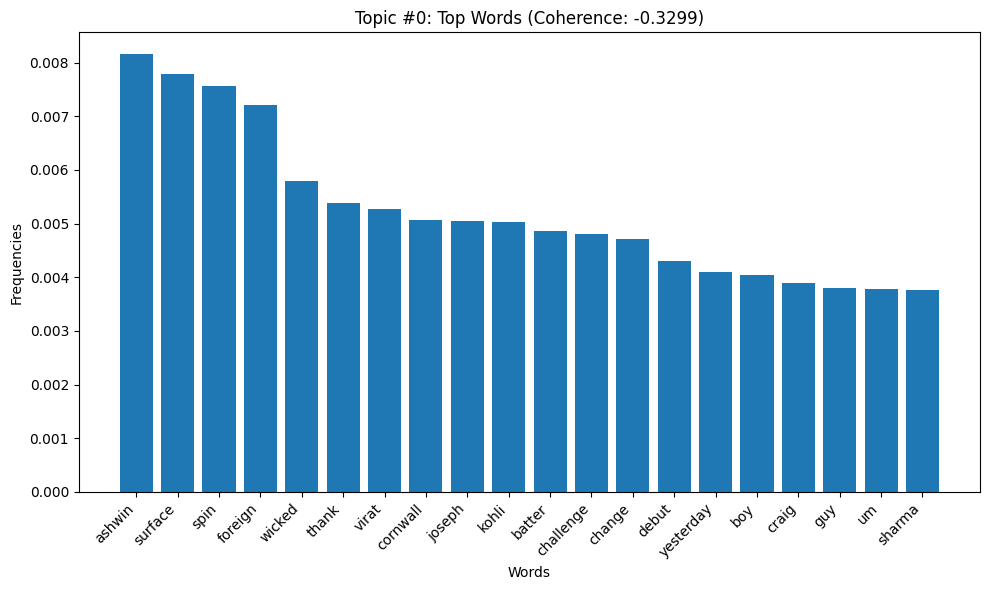

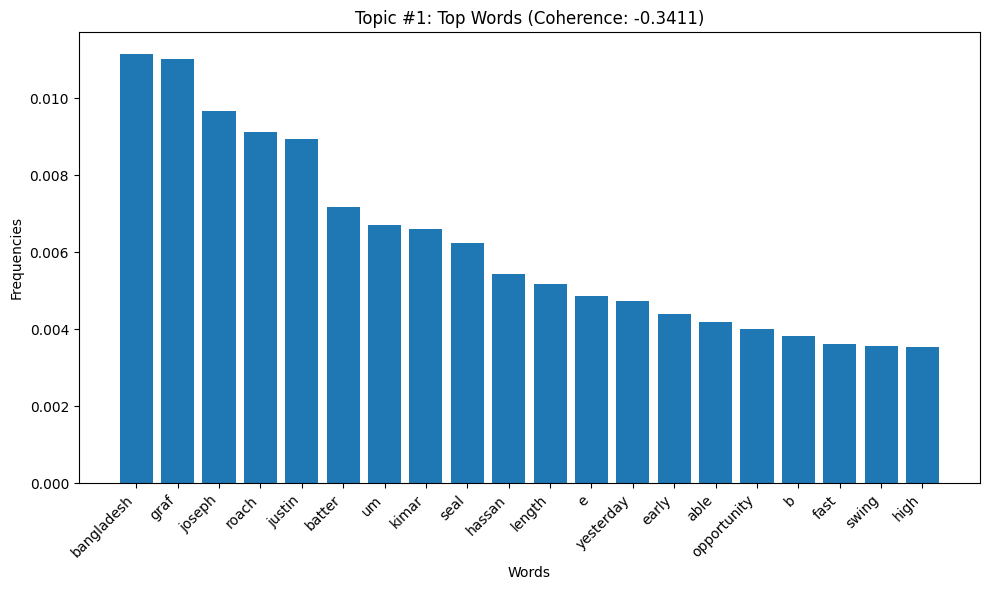

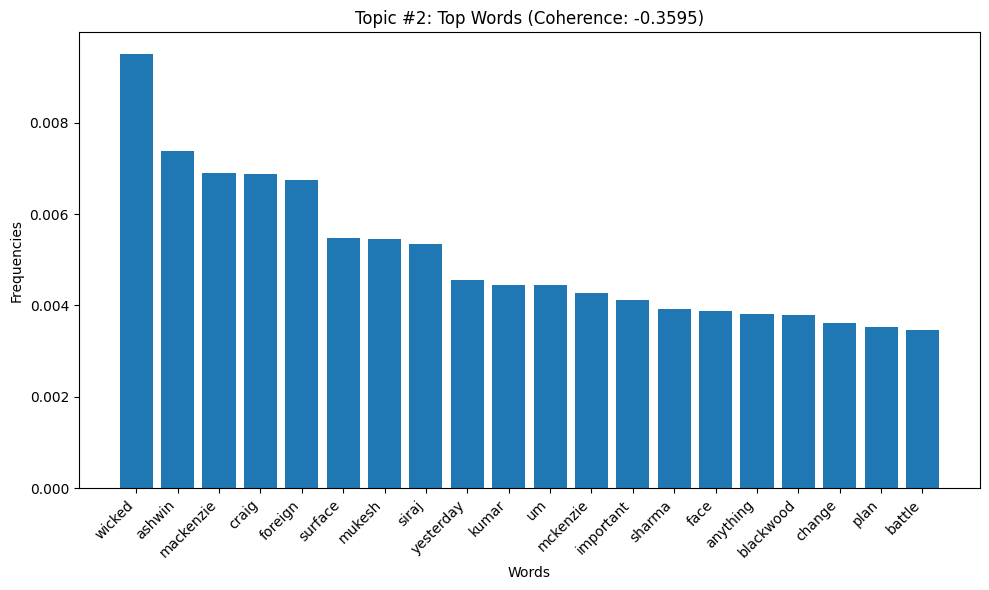

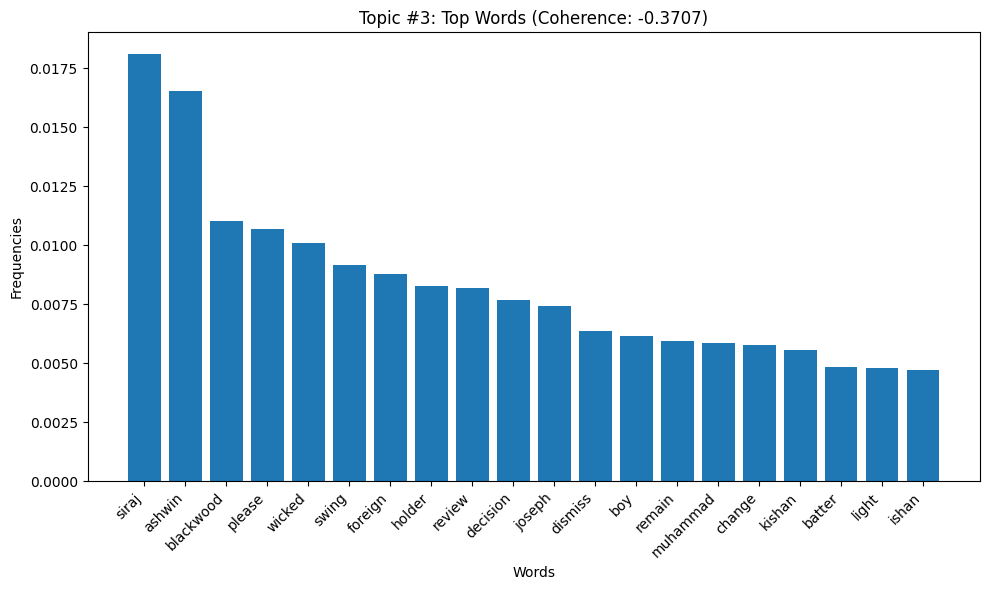

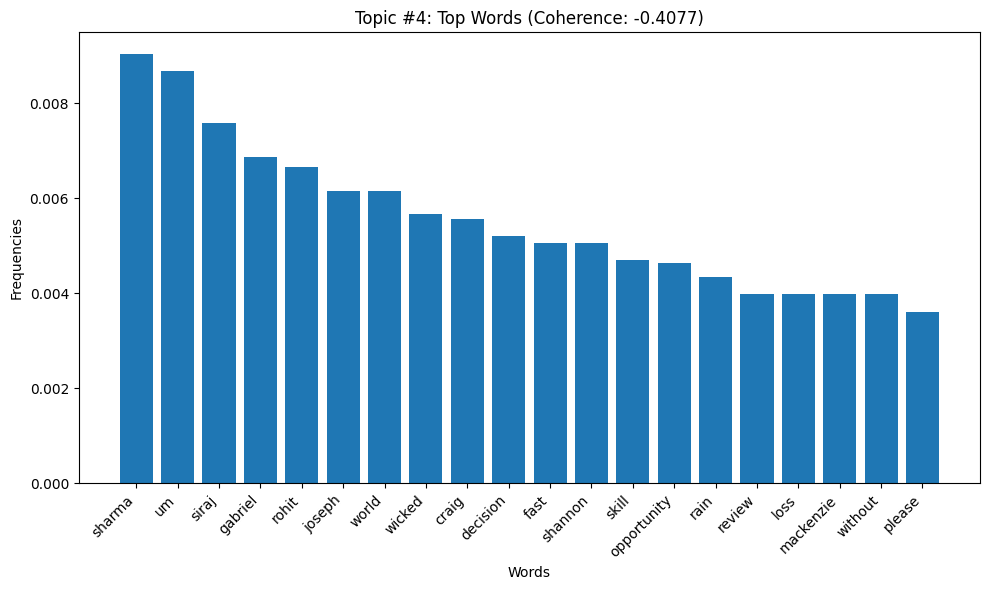

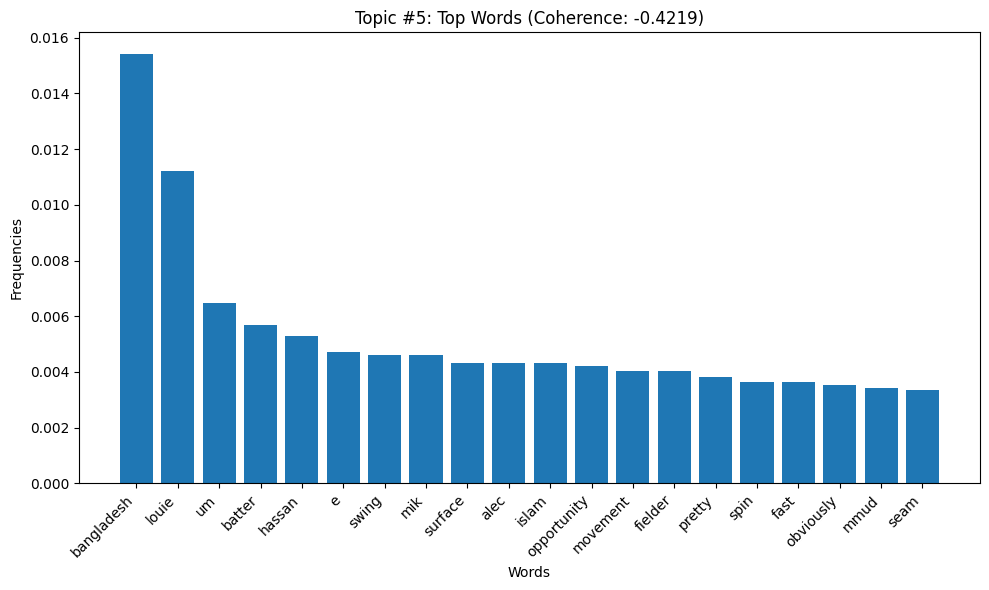

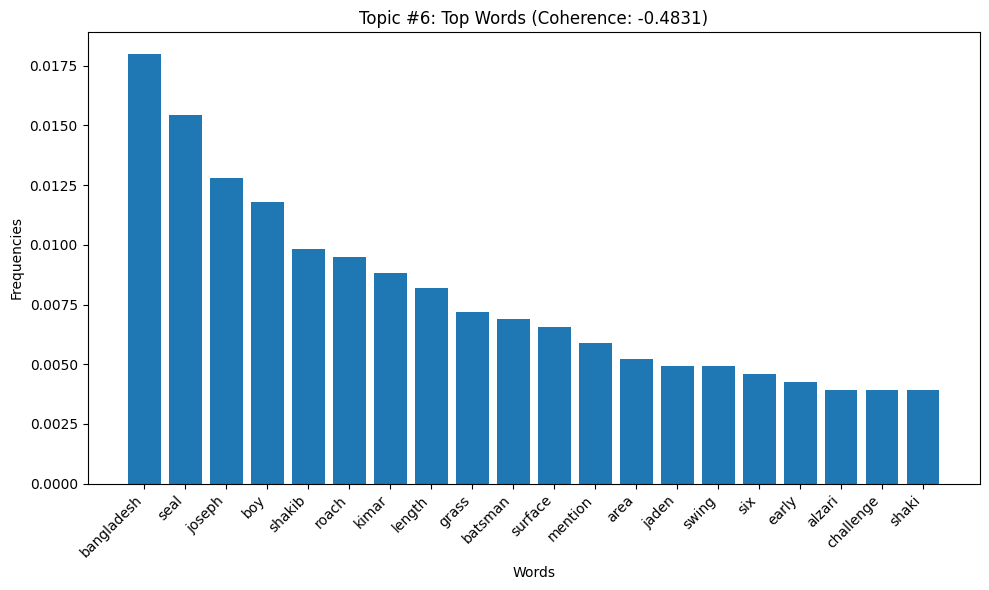

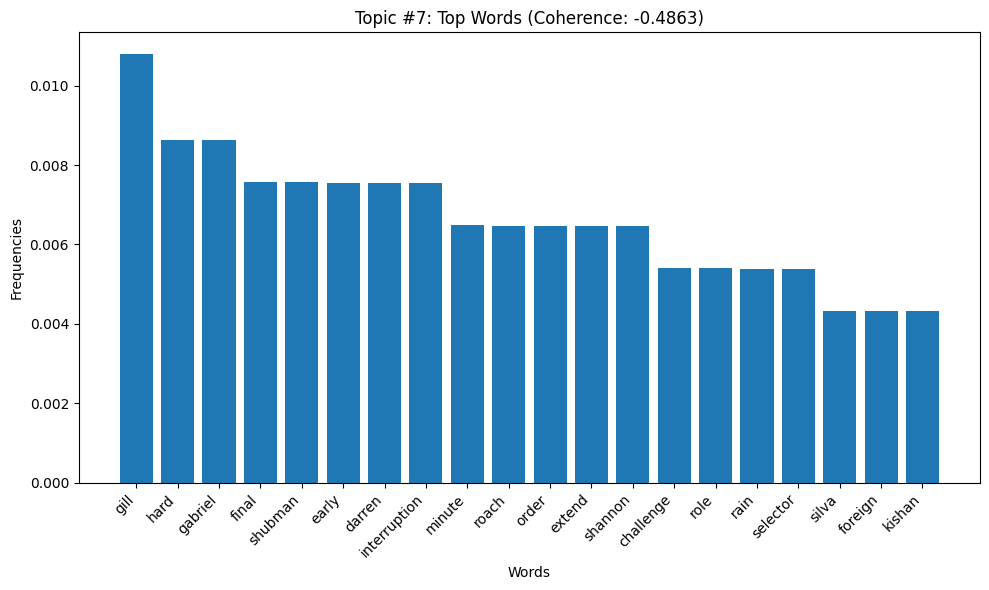

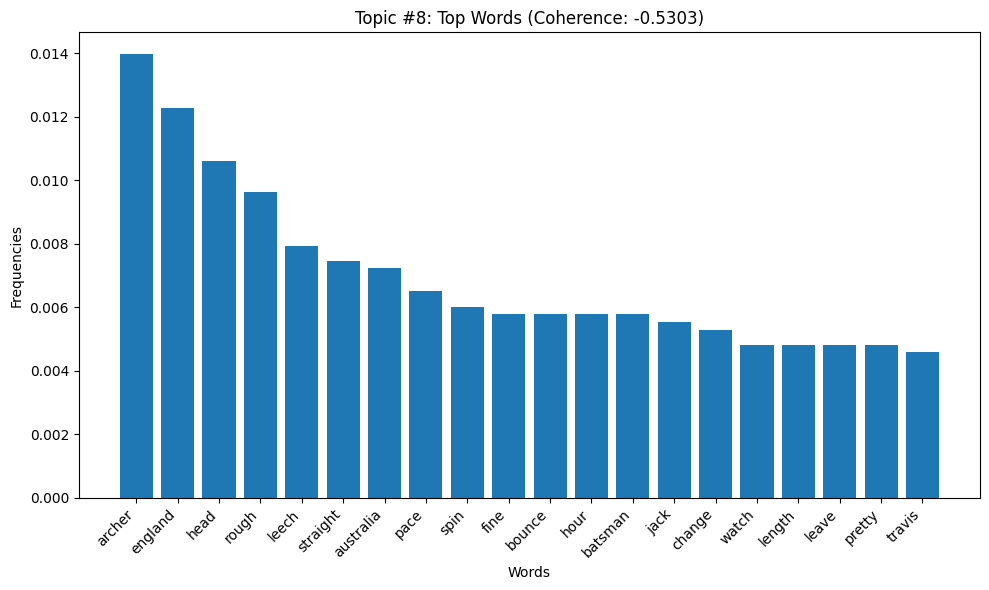

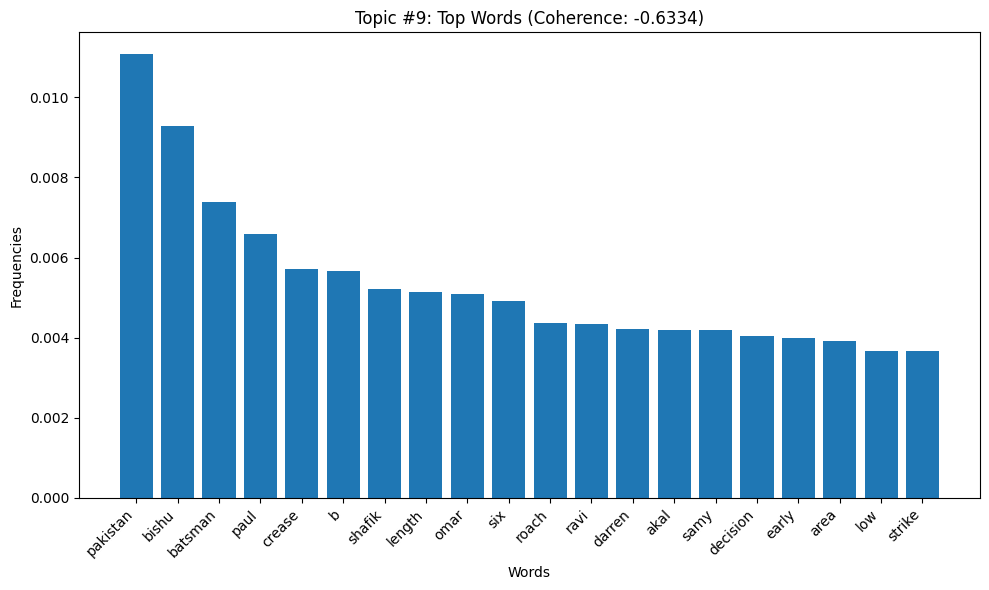

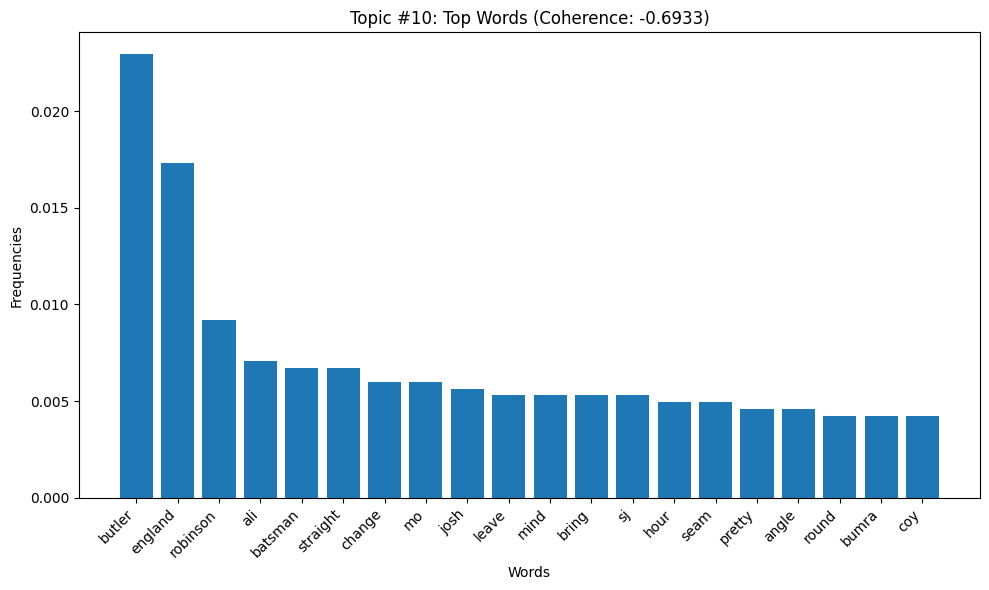

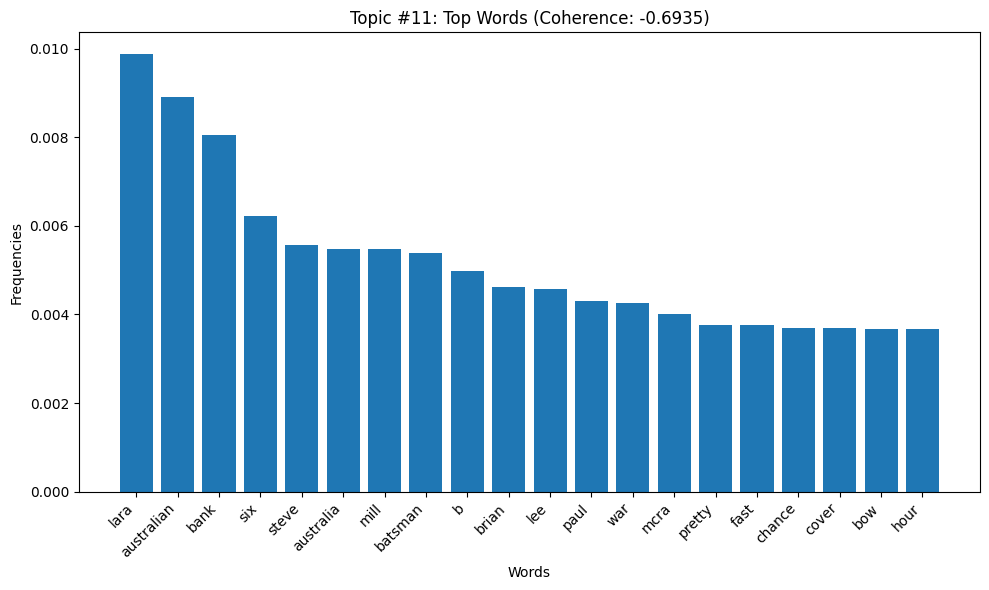

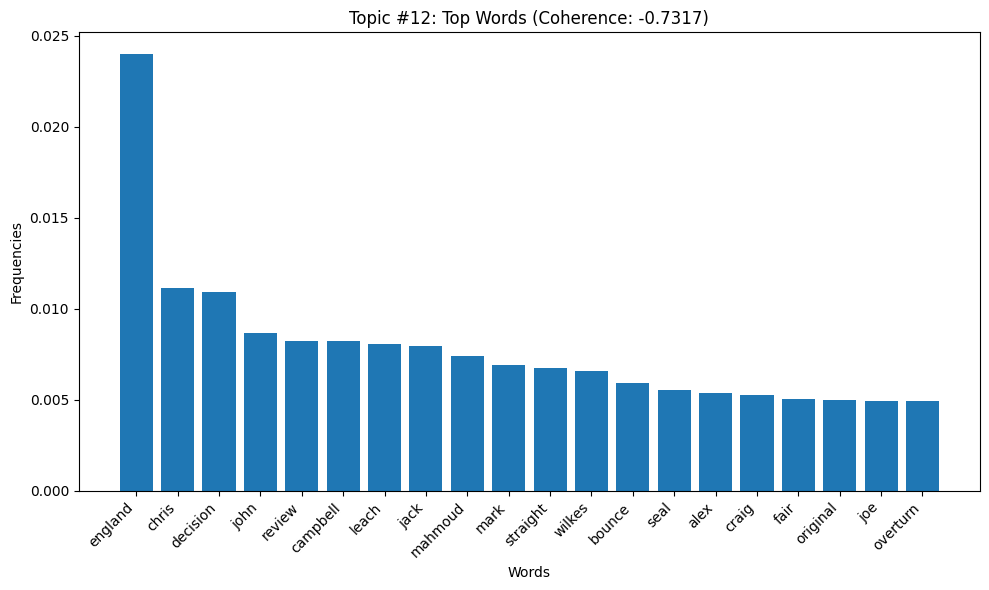

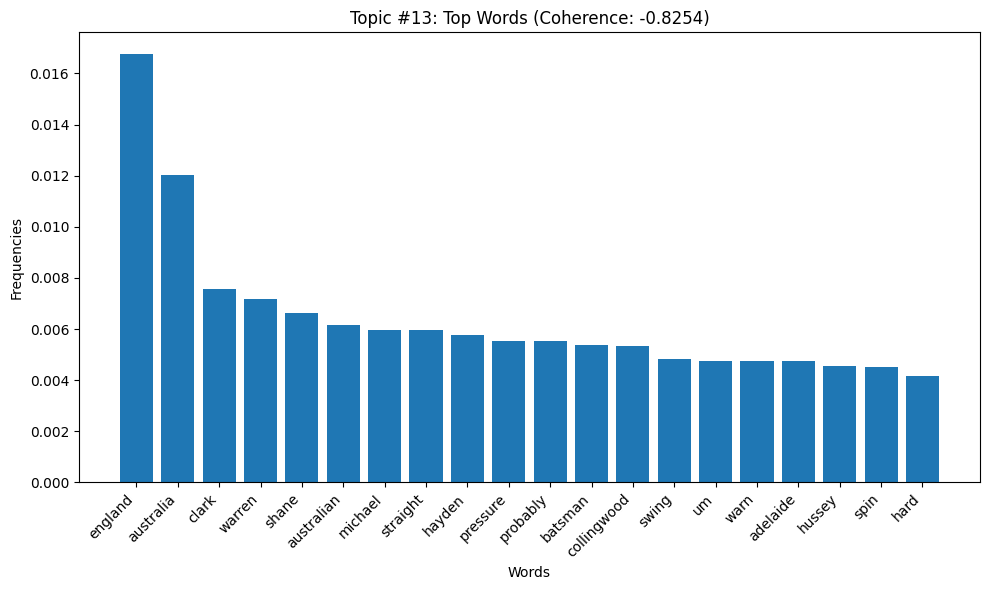

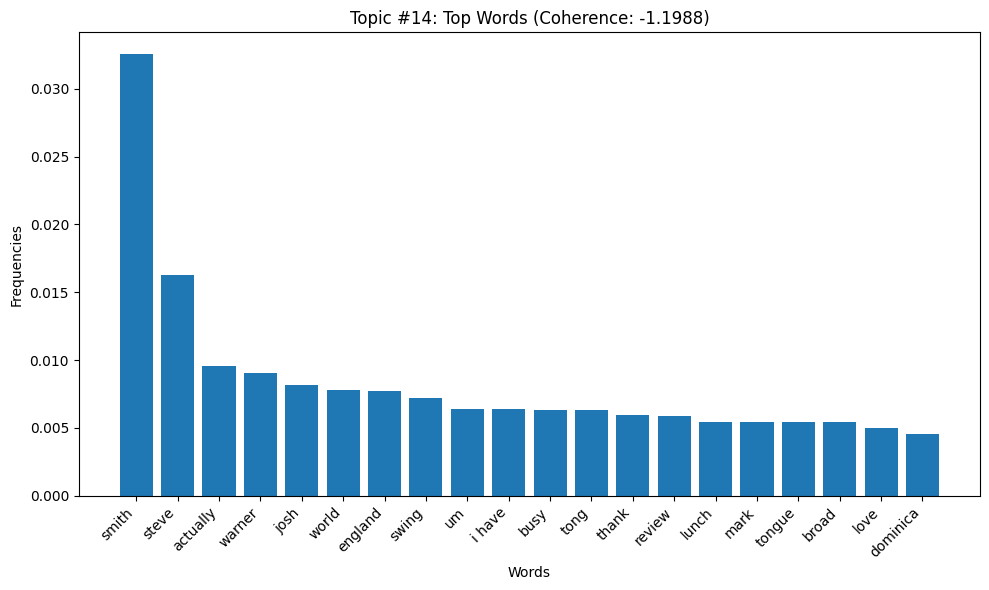

In [ ]:
# Visualize Top Words per Topic

import matplotlib.pyplot as plt

def plot_topic_topn(top_topics):
    """
    Plots the top N words for each topic with their frequencies, sorted by decreasing frequency.

    Args:
        top_topics: A list of tuples, where each tuple contains a list of (frequency, word) pairs and the coherence score.
    """
    for i, (topic, coherence) in enumerate(top_topics):
        words = [word for freq, word in topic]
        frequencies = [freq for freq, word in topic]

        plt.figure(figsize=(10, 6))
        plt.bar(words, frequencies)
        plt.xlabel("Words")
        plt.ylabel("Frequencies")
        plt.title(f"Topic #{i}: Top Words (Coherence: {coherence:.4f})")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

plot_topic_topn(top_topics)

### UMass Topic Coherence Explained

UMass coherence is a metric that evaluates how semantically coherent the words within a topic are. It works by:

1. Calculating how frequently the top words in a topic co-occur in the same documents
2. Using a logarithmic function to measure the statistical support for word pairs

The UMass coherence measure always produces negative values, where values closer to zero indicate better (more coherent) topics. The more negative the value, the less coherent the topic.

### Interpreting Your Results

Your average topic coherence is -7.9666, with individual topics ranging from -3.00 (most coherent) to -13.47 (least coherent).

Looking at the topics:

1. The most coherent topics (0-2) with scores around -3 appear to be related to biblical content with clear themes (apostles, wisdom literature, and kings/kingdoms)
2. Middle-range topics (3-7) with scores between -4 and -6 still show thematic cohesion but with some outlier terms
3. The least coherent topics (17-19) with scores below -12 contain more seemingly unrelated terms

A good rule of thumb is that topics with coherence values above -4 are generally considered good, while those below -10 may be problematic.


FOR u_mass coherence metric: more coherence = higher/less negative value


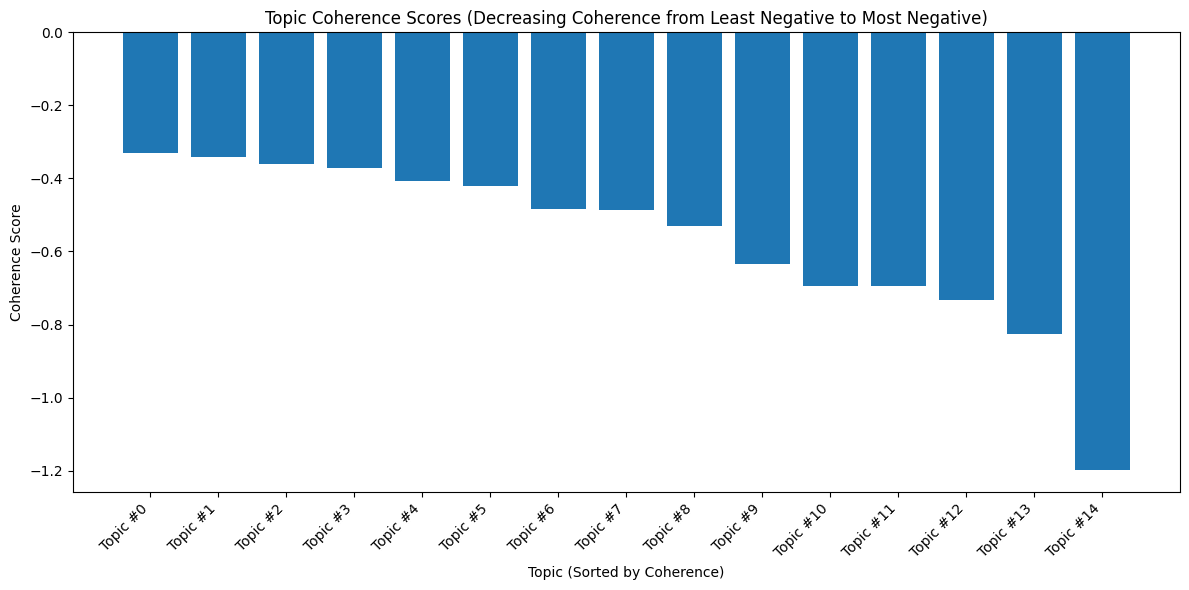

In [ ]:
# Visual Coherence of Topics
import matplotlib.pyplot as plt

def plot_coherence(top_topics):
    """
    Plots the coherence scores of topics in decreasing order (least negative to most negative) using a bar chart.

    Args:
        top_topics: A list of tuples, where each tuple contains a list of (frequency, word) pairs and the coherence score.
    """
    coherence_scores = [coherence for _, coherence in top_topics]
    topic_numbers = list(range(len(top_topics)))

    # Sort the coherence scores and topic numbers in decreasing order (largest/least negative to smallest/most negative)
    sorted_coherence = sorted(zip(coherence_scores, topic_numbers), reverse=True)
    sorted_scores, sorted_topics = zip(*sorted_coherence)

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(sorted_scores)), sorted_scores)
    plt.xlabel("Topic (Sorted by Coherence)")
    plt.ylabel("Coherence Score")
    plt.title("Topic Coherence Scores (Decreasing Coherence from Least Negative to Most Negative)")
    plt.xticks(range(len(sorted_scores)), [f"Topic #{topic}" for topic in sorted_topics], rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

print('FOR u_mass coherence metric: more coherence = higher/less negative value')
plot_coherence(top_topics)

**WHY ONLY u_mass coherence metric?**

* **`u_mass` Values:** All `u_mass` coherence scores are now 0.0.
* **`c_uci` and `c_npmi` Values:** `c_uci` and `c_npmi` are still `inf`.

**Analysis:**

1.  **`u_mass` = 0.0:**
    * The fact that all `u_mass` scores are 0.0 after filtering rare words suggests that the filtering might have removed too many words.
    * This could result in word co-occurrence counts that are too low or even zero, which can lead to zero coherence scores.
    * This also could mean that the corpus is now so sparse, that the u_mass calculation is failing.

2.  **`c_uci` and `c_npmi` = `inf`:**
    * The `c_uci` and `c_npmi` values are still `inf`, indicating that the rare word filtering alone did not resolve the numerical instability issues.

**Next Steps:**

1.  **Adjust Rare Word Filtering:**
    * Reduce the aggressiveness of the rare word filtering. Instead of `min_doc_frequency = 2`, try a lower value, such as `min_doc_frequency = 1`. This will remove fewer words.
    * If min_doc_frequency = 1 still returns all 0.0 values, then this means that the corpus is very sparse.

2.  **Inspect Corpus and Dictionary After Filtering:**
    * Print the `corpus` and `dictionary` again after filtering to see how much they have changed.
    * Print the length of a few documents from the texts variable.

3.  **Consider Alternative Metrics:**
    * Given the persistent issues with `c_uci` and `c_npmi`, and the 0.0 u_mass values, it may be necessary to accept that these metrics are not suitable for your specific dataset.
    * You might need to focus on qualitatively evaluating the topics or explore alternative coherence metrics or topic evaluation techniques.



In [ ]:
'''
# UNCOMMENT if corpus characteristics can generate valid coherence metrics beyond u_mass
#           (see explanation above)

%%time

# NOTE: 2m01s @20220328 with Google Colab/CPU on Harry Potter
#        1m05s 20230401 at 10:37EST with Google Colab/CPU on JourneyToTheWest_4vol_2003_Chengen
# NOTE:        @@20250320 with St. James Bible

# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = No_of_Topics
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus, topn=No_of_Words)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.

from pprint import pprint
pprint(top_topics)

print('\n\n')
for i, atopic in enumerate(top_topics):
    print(f'Topic #{i}: coherence = {atopic[1]}')

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('\nAverage topic coherence: %.4f.' % avg_topic_coherence)

# Visualize Top Words per Topic

import matplotlib.pyplot as plt

def plot_topic_topn(top_topics):
    """
    Plots the top N words for each topic with their frequencies, sorted by decreasing frequency.

    Args:
        top_topics: A list of tuples, where each tuple contains a list of (frequency, word) pairs and the coherence score.
    """
    for i, (topic, coherence) in enumerate(top_topics):
        words = [word for freq, word in topic]
        frequencies = [freq for freq, word in topic]

        plt.figure(figsize=(10, 6))
        plt.bar(words, frequencies)
        plt.xlabel("Words")
        plt.ylabel("Frequencies")
        plt.title(f"Topic #{i}: Top Words (Coherence: {coherence:.4f})")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

plot_topic_topn(top_topics)

# Revised response to match the variable names in the provided code:

import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

def plot_coherence(model, corpus, dictionary, texts, top_topics):
    """
    Plots the coherence scores of topics using different coherence metrics.

    Args:
        model: Trained LDA model.
        corpus: Corpus used to train the LDA model.
        dictionary: Dictionary used to train the LDA model.
        texts: Original tokenized texts.
        top_topics: The output from model.top_topics().
    """

    coherence_metrics = ['u_mass', 'c_v', 'c_uci', 'c_npmi']
    coherence_scores = {}

    for metric in coherence_metrics:
        cm = CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, texts=texts, coherence=metric)
        coherence_values = cm.get_coherence_per_topic()
        coherence_scores[metric] = coherence_values

    topic_numbers = list(range(num_topics)) # use num_topics from the code

    plt.figure(figsize=(15, 8))

    for metric, scores in coherence_scores.items():
        plt.plot(topic_numbers, scores, marker='o', label=metric)

    plt.xlabel("Topic")
    plt.ylabel("Coherence Score")
    plt.title("Topic Coherence Scores by Different Metrics")
    plt.xticks(topic_numbers)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("""
    Interpreting Coherence Metrics:

    - u_mass (UMass): This metric is based on document co-occurrence. It measures how frequently words
      within a topic co-occur in the original documents. Lower (more negative) scores indicate better
      coherence. It is efficient to compute but can be sensitive to word frequency.

    - c_v: This metric uses a sliding window and cosine similarity to measure word co-occurrence.
      Scores range from 0 to 1, with higher scores indicating better coherence. It tends to correlate
      well with human judgment.

    - c_uci: This metric also uses a sliding window but calculates pointwise mutual information (PMI)
      between word pairs. Scores are typically between -10 and 10, with higher scores indicating
      better coherence. It is less sensitive to word frequency than u_mass.

    - c_npmi: Normalized pointwise mutual information (NPMI) is another metric based on PMI,
      normalized to range from -1 to 1. Higher scores indicate better coherence. It is also less
      sensitive to word frequency.

    Comparison:

    - u_mass is generally faster but can produce counter-intuitive results due to its sensitivity
      to word frequency.
    - c_v tends to provide scores that align well with human interpretation of topic coherence.
    - c_uci and c_npmi are improvements over u_mass in terms of handling word frequency bias,
      with c_npmi being a normalized version of c_uci.

    In practice, c_v and c_npmi are often preferred for their better agreement with human judgment.
    """)
''';

In [ ]:
print(texts[:5])

[['match', '', 'bumrah', 'siraj', 'fire', 'india', 'to', 'victory', '', 'final', 'session', 'in', 'full', '', 'england', 'v', 'india', 'om', 'who is', 'influential', 'role', 'play', 'today', 'get', 'india', 'hole', 'first', 'bat', 'unbelievable', 'remarkable', 'partnership', 'muhammad', 'shami', 'start', 'day', 'india', 'really', 'look', 'like', 'lose', 'position', 'p', 'position', 'favorite', 'win', 'uh', 'start', 'thing', 'well', 'wicked', 'rory', 'burn', 'bowling', 'good', 'fire', 'aggression', 'start', 'day', 'joe', 'root', 'uh', 'role', 'batsman', 'earlier', 'center', 'thing', 'england', 'threw', 'away', 'position', 'bad', 'hour', 'field', 'lunch', 'last', 'day', 'eing', 'flow', 'whole', 'game', 'do', 'coy', 'slip', 'bumra', 'first', 't', "england's", 'captain', 'go', 'real', 'drama', 'elation', 'india', 'safe', 'fan', 'captain', 'first', 'slip', 'bumra', 'probe', 'round', 'stump', 'life', 'bounce', 'straight', 'pouch', 'real', 'chance', 'india', 'door', 'open', 'root', 'five', 'm

In [ ]:
print("Corpus (first 10 documents):")
for doc in corpus[:10]:
    print(doc)

Corpus (first 10 documents):
[(0, 2), (1, 4), (2, 1), (3, 1), (4, 3), (5, 10), (6, 1), (7, 1), (8, 1), (9, 4), (10, 1), (11, 5), (12, 3), (13, 1), (14, 4), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 20), (30, 4), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 2), (40, 2), (41, 3), (42, 2), (43, 1), (44, 9), (45, 1), (46, 1), (47, 13), (48, 3), (49, 1), (50, 3), (51, 1), (52, 1), (53, 1), (54, 4), (55, 1), (56, 5), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 2), (71, 1), (72, 5), (73, 1), (74, 8), (75, 1), (76, 1), (77, 4), (78, 1), (79, 1), (80, 2), (81, 1), (82, 3), (83, 1), (84, 2), (85, 1), (86, 1), (87, 19), (88, 1), (89, 7), (90, 3), (91, 1), (92, 1), (93, 1), (94, 1), (95, 6), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 7), (106, 1), (107, 

In [ ]:
empty_docs = [i for i, doc in enumerate(corpus) if not doc]
if empty_docs:
    print(f"\nWarning: Empty documents found at indices: {empty_docs}")

In [ ]:
print("\nDictionary (first 20 items):")
for token_id, token in list(dictionary.items())[:20]:
    print(f"{token_id}: {token}")


Dictionary (first 20 items):
0: ability
1: able
2: abolutely
3: absence
4: absolute
5: absolutely
6: absorb
7: abuse
8: accept
9: across
10: act
11: action
12: actually
13: adapt
14: add
15: adjustment
16: admar
17: adult
18: advent
19: afford


# Visualize

---

### 1. The Intertopic Distance Map (Left Panel)

- **Topics as Circles:**  
  Each circle represents a topic. The area of the circle is roughly proportional to the topic's prevalence in your corpus (i.e., how many documents or how much text is assigned to that topic).

- **Distance Between Topics:**  
  The distance between circles reflects the similarity between topics. Topics that are closer together share more similar word distributions, whereas topics that are farther apart are more distinct. If circles overlap significantly, it suggests that those topics might be redundant or not well separated.

- **Axes:**  
  The axes are generated via a dimensionality reduction technique (often t-SNE or multidimensional scaling). Although the axes themselves do not have a direct interpretative meaning, they provide a spatial summary of topic similarities.

---

### 2. The Term Relevance Panel (Right Panel)

- **Top Terms:**  
  This panel shows a ranked list of terms (words) that are most relevant for the selected topic. The list is dynamic: clicking on a topic (a circle in the left panel) updates the list of words shown.

- **Relevance Metric (\(\lambda\)):**  
  pyLDAvis allows you to adjust a slider for the relevance metric \(\lambda\). This metric balances:
  - **Term Probability:** How often the word appears in the topic.
  - **Term Exclusivity:** How unique the word is to that topic compared to others.
  
  At $\lambda = 1$, words are ranked purely by their probability in the topic (frequent words). At lower \(\lambda\) values, more weight is given to words that are more exclusive to the topic. This balance helps in identifying words that not only are common within a topic but also distinguish it from others.

- **Bar Chart Interpretation:**  
  Next to each term, you typically see bars or numbers indicating:
  - The overall frequency of the term in the corpus.
  - The weight or importance of the term in the topic.
  
  These details help you assess whether a term is both representative and unique for a topic.

---

### 3. Interactive Exploration

- **Topic Selection:**  
  Clicking on any topic circle in the intertopic distance map highlights that topic and updates the list of top terms on the right panel. This allows you to drill down into each topic’s composition.

- **Adjusting $\lambda$:**  
  Experiment with the $\lambda$ slider to see how the ranking of terms changes. This helps to understand both the common and the more discriminative words in a topic. For instance, if certain terms disappear as you lower \(\lambda\), they might be common across multiple topics rather than unique to the one you’re examining.

---

### 4. Drawing Conclusions

- **Topic Coherence and Interpretability:**  
  Look at whether the top terms for a topic form a coherent theme or concept. A well-separated topic should have a set of terms that collectively make sense and align with a known theme or domain.

- **Overlap and Redundancy:**  
  If topics are overlapping considerably on the distance map, it may indicate that the model is producing redundant topics. This might be a cue to adjust the number of topics or other hyperparameters.

- **Model Tuning:**  
  Use the insights from the visualization to refine your model. For example, if some topics appear too general (with common words across topics), you might adjust the model’s hyperparameters (e.g., Dirichlet priors) or the preprocessing steps (e.g., stopword removal) to encourage more distinct topics.

---

### Summary

To interpret a pyLDAvis visualization effectively:
1. **Examine the intertopic distance map** to see the distinctiveness and prevalence of topics.
2. **Review the top terms list** for each topic, considering both their frequency and exclusivity.
3. **Utilize interactive features** (clicking topics and adjusting \(\lambda\)) to explore how words contribute to each topic.
4. **Refine your model** based on observed overlaps or unclear topics to achieve better topic coherence and separation.

This structured interpretation can help you not only understand the output of your LDA model but also guide iterative improvements for more meaningful topic discovery.

In the context of topic modeling visualization with pyLDAvis, **λ (lambda)** is a tuning parameter used to balance two aspects of term importance when ranking words for each topic. The relevance of a term \( w \) in a topic \( t \) is defined as:

$$
r(w, t \mid \lambda) = \lambda \log p(w \mid t) + (1-\lambda) \log \frac{p(w \mid t)}{p(w)}
$$

Where:
- \( p(w \mid t) \) is the probability of the term \( w \) in the topic \( t \).
- \( p(w) \) is the overall probability of the term \( w \) in the entire corpus.

### What Does This Mean?

- **When \(\lambda = 1\):**  
  The ranking is based solely on the term's probability within the topic (\( p(w \mid t) \)). In this case, the most frequent words in the topic are shown, but they might also be common across the entire corpus, which could reduce the distinctiveness of the topic.

- **When \(\lambda = 0\):**  
  The ranking is based solely on the term's lift, \( \frac{p(w \mid t)}{p(w)} \), which measures how exclusive a word is to that topic relative to its overall frequency. This helps surface words that are more unique to the topic, even if they are not the most frequent.

- **Intermediate Values (e.g., \(\lambda = 0.6\)):**  
  Provide a balanced view by considering both frequency and exclusivity, often leading to a more interpretable set of top terms for each topic.

### Why Is Lambda Useful?

- **Interactivity:**  
  In pyLDAvis, you can interactively adjust the \(\lambda\) slider. This allows you to see how the list of top terms for a topic changes based on the balance between commonality and uniqueness.
  
- **Enhanced Interpretability:**  
  By tuning \(\lambda\), you can identify words that are not only frequent in the topic but also distinctive compared to the overall corpus. This improves the semantic clarity of the topics.

In summary, \(\lambda\) is a critical parameter for refining the interpretability of your LDA model's output in pyLDAvis, enabling you to explore different aspects of term relevance within topics.

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
# vis_data = gensimvis.prepare(lda, corpus, dictionary)
vis_data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(vis_data)

## Things to experiment with

* ``no_above`` and ``no_below`` parameters in ``filter_extremes`` method.
* Adding trigrams or even higher order n-grams.
* Consider whether using a hold-out set or cross-validation is the way to go for you.
* Try other datasets.

## Where to go from here

* Check out a RaRe blog post on the AKSW topic coherence measure (http://rare-technologies.com/what-is-topic-coherence/).
* pyLDAvis (https://pyldavis.readthedocs.io/en/latest/index.html).
* Read some more Gensim tutorials (https://github.com/RaRe-Technologies/gensim/blob/develop/tutorials.md#tutorials).
* If you haven't already, read [1] and [2] (see references).

## References

1. "Latent Dirichlet Allocation", Blei et al. 2003.
2. "Online Learning for Latent Dirichlet Allocation", Hoffman et al. 2010.


